<img src='data/images/lecture-notebook-header.png' />

## Project Team 12

<pre>
Kelvin Soh Boon Kai, Lee Fuk Sing, Lim Gen Liang, Putri Darmawan
School of Computing
National University of Singapore
Singapore
{ e1124460, fs.lee, limgenliang, putridarmawan }@u.nus.edu    
</pre>

Date: Feb 20, 2024

This text mining project aims to build a reliable system distinguishing human-generated text from Language Model Models (LLMs), particularly OpenAI's GPT-like models. Focused on natural language processing and AI ethics, our objective is to create a machine learning model addressing concerns about misattributed AI-generated content in various areas.

---

## Task 1 - Exploratory Data Analysis

To be developed..

Simple analysis of the data and have a general idea of data distribution, statistics.

1. File read
   - Local file read
3. Text processing
   - Tokenization: Sentences (PunktSentenceTokenizer)
   - Tokenization: Tokens (TreebankWordTokenizer)
   - Stemming (skipped)
   - Part-of-Speech (POS) Tagging
   - N-Grams analysis
4. Statistics
   - Text size
   - Sentence count
   - Word count
6. Visualization
   - Wordcloud (with no stop words)
   - Statistics

<div align=center>
    <img src='data/images/ie-architecture.png' width=500/>
    <div>Figure 1: Simple Pipeline Architecture for an Information Extraction System. This system takes the raw text of a document as its input, and generates a list of (entity, relation, entity) tuples as its output. Source: https://www.nltk.org/book/ch07.html</div>
</div>


---

Exploratory Data Analysis (EDA) is a crucial step in understanding and preparing your dataset for further analysis. Here are some EDA tasks you can perform with your BBC news articles dataset on politics:

1. Data Loading and Inspection:
- Load the dataset into your preferred analysis environment (e.g., Python with pandas).
- Check the structure of the dataset (number of rows and columns).
- View a sample of the data to understand its format and contents.

2. Basic Statistics:
- Compute basic statistics such as mean, median, mode, standard deviation, etc., for relevant columns like word count, article length, publication date, etc.
- Determine the distribution of articles over time (e.g., daily, monthly, yearly).

3. Text Preprocessing:
- Tokenize the text into words or phrases.
- Remove stop words (commonly occurring words that typically do not contribute much to the meaning of the text).
- Perform stemming or lemmatization to reduce words to their root forms.

4. Word Frequency Analysis:

- Identify the most frequent words in the dataset.
- Explore the distribution of word frequencies.
- Visualize word frequencies using techniques like word clouds or bar plots.

5. Topic Modeling:

- Apply topic modeling techniques (e.g., Latent Dirichlet Allocation, Non-negative Matrix Factorization) to discover latent topics within the articles.
- Visualize the results of topic modeling to understand the prevalent themes in the dataset.

6. Sentiment Analysis:

- Analyze the sentiment of articles to understand the overall tone (positive, negative, neutral).
- Visualize sentiment trends over time.

7. Named Entity Recognition (NER):

- Use NER techniques to identify and extract entities such as people, organizations, and locations mentioned in the articles.
- Analyze the frequency and distribution of named entities.

8. Document Similarity Analysis:

- Compute similarities between articles based on their content (e.g., using cosine similarity).
- Cluster similar articles together to identify groups of related news stories.

9. Visualization:

- Visualize the distribution of articles by different categories (e.g., publication source, political party mentioned, geographical location).
- Create word clouds, histograms, scatter plots, etc., to illustrate key insights.

10. Language and Text Complexity:

- Analyze the complexity of language used in the articles (e.g., readability scores).
- Explore the variation in text complexity across different publishers or authors.

11. Named Entity Co-occurrence Analysis:

- Analyze the co-occurrence patterns of named entities within articles to uncover relationships between different entities.

12. Exploring Relationships:

- Investigate relationships between different variables such as article length and publication date, sentiment and topic, etc.
- Use correlation analysis or visualization techniques like scatter plots to identify potential associations.

---

## Setting up the Notebook

### Project settings

In [1]:
proj = {
    'input_folder': r'data\datasets\bbc\politics',  # input folder
    'generated_phi': r'generated\cleaned\cleaned_microsoft_2',
    'generated_mistral': r'generated\cleaned\cleaned_mistral_2',
    'generated_gpt': r'generated\cleaned\data_generated_gpt_2',
    'lib': 'nltk',                                  # 'nltk' or 'spacy', preferred library for tasks like tokenization and pos tagging
    'keywords': 10,                                 # top k keywords per source document, exported for article generation in next stage
    'ngrams': 2,
}

feat_list = {
    'path',
    'name',
    'text',
    'length',
    # ---
    'paragraphs',
    'sentences'
    'tokens',
    # ---
    'pos_tags',
    # ---
    'count_paragraphs',
    'count_sentences',
    'count_tokens',
    # ---
    'chars_per_paragraph', 'chars_per_sentence', 'chars_per_token',
    'tokens_per_paragraph', 'tokens_per_sentence',
    'sentences_per_paragraph'
}

feat = {}
for f in feat_list:
    feat[f] = f

```
doc['path']: data\datasets\bbc\politics\001.txt
doc['name']: 001.txt
doc['length']: 2601
doc['paragraphs']: 6 items
doc['count_paragraphs']: 6
doc['sentences']: 19 items
doc['count_sentences']: 19
```

### Import all Required Packages

We use NLTK a spaCy, two very popular and mature Python packages for language processing.


In [2]:
!python -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 182.0 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
import glob
import os
from pathlib import Path

from nltk.tokenize.punkt import PunktSentenceTokenizer
from nltk.tokenize import TreebankWordTokenizer
# from nltk.tokenize import TweetTokenizer
# from nltk.tokenize import RegexpTokenizer

from nltk import word_tokenize  # Simplfied notation; it's a wrapper for the TreebankWordTokenizer
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

from nltk.help import upenn_tagset
from nltk import pos_tag
from nltk import ngrams

import spacy
# Load English language model
nlp = spacy.load('en_core_web_sm')

from tqdm import tqdm
from src.plotutil import show_wordcloud

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/genliang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NLTK provides more tokenizers: http://www.nltk.org/api/nltk.tokenize.html

### BBC News Dataset

http://mlg.ucd.ie/datasets/bbc.html 


The dataset is a collection of news articles from the BBC, categorized into various topics, including business, entertainment, politics, sport, and tech. The data consists of 2225 documents collected from the BBC news website of various topics, from 2004 to 2005. The topics are business, entertainment, politics, sports and tech. Each document is stored as a text file. For this project, we would like to focus on the politics documents. The aim is to allow the model to correctly classify the news data in several few topics before generalizing to other topics. t.

In [3]:
# proj['input_folder']
def load_data(data_path):
    data_path = os.path.join(*data_path.split('\\'))
    docs = []
    paths = glob.glob(os.path.join(data_path, '*'))
    for path in tqdm(paths):
        if os.path.isfile(path):
            if 'mistral' in data_path:
                with open(path, 'r', encoding='cp437') as file:
                    text = file.read()
                    docs.append({
                        'path': path,
                        'name': os.path.basename(path),
                        'text': text,
                        'length': len(text),
                    })
            else:
                with open(path, 'r', encoding='utf-8') as file:
                    text = file.read()
                    docs.append({
                        'path': path,
                        'name': os.path.basename(path),
                        'text': text,
                        'length': len(text),
                    })

    print(f"Number of files from the dataset: {len(docs)}\n")
    return docs

In [4]:
docs = load_data(proj['input_folder'])

doc = docs[0]
for k in doc.keys():
    if k == 'text':
        continue
    if isinstance(doc[k], (list, tuple, dict) ):
        v = f"{len(doc[k])} items"
    else:
        v = doc[k]
    print(f"doc['{k}']: {v}")        

100%|█████████████████████████████████████| 417/417 [00:00<00:00, 106967.45it/s]

Number of files from the dataset: 417

doc['path']: data/datasets/bbc/politics/096.txt
doc['name']: 096.txt
doc['length']: 2137


### Rest of the LLM datasets
Load the rest of the LLM datasets, phi-2, mistral, GPT

In [5]:
docs_phi2 = load_data(proj['generated_phi'])
docs_mistral = load_data(proj['generated_mistral'])
docs_gpts = load_data(proj['generated_gpt'])

100%|██████████████████████████████████████| 417/417 [00:00<00:00, 26150.12it/s]


Number of files from the dataset: 417



100%|██████████████████████████████████████| 417/417 [00:00<00:00, 80939.64it/s]


Number of files from the dataset: 417



100%|█████████████████████████████████████| 417/417 [00:00<00:00, 109048.24it/s]

Number of files from the dataset: 417



### Target features of the dataset:

for each doc from the list of documents
1. path: location of the text file
2. name: name of the text file
3. text: loaded text from the file
4. length: number of characters
5. paragraphs: number of paragraphs
6. sentences: the list of sentences, and count_sentences: number of sentences
7. tokens: the list of tokens, and count_tokens: number of tokens
8. pos_tags: Part of Speech (POS) tags

## Tokenization with NLTK

### Document tokenization into paragraphs and sentences

Split the documents into paragraphs and sentences and not yet individual tokens.

In [7]:
def tokenize_doc(docs):
    sentence_tokenizer = PunktSentenceTokenizer()

    for doc in docs:
        doc['paragraphs'] = [p.strip() for p in doc['text'].split('\n\n') if p.strip()]
        doc['count_paragraphs'] = len(doc['paragraphs'])
        # print(f"{doc['name']}: {doc['count_paragraphs']} paragraphs")
        doc['sentences'] = sentence_tokenizer.tokenize(doc['text'])
        doc['count_sentences'] = len(doc['sentences'])
        # print(doc['count_sentences'])
    return docs

In [8]:
# sample output only
#
# The first document in a list of sentences
#

docs = tokenize_doc(docs)
for i, doc in enumerate(docs):
    # print(doc)
    for k in doc.keys():
        if k == 'text':
            continue
        if isinstance(doc[k], (list, tuple, dict) ):
            v = f"{len(doc[k])} items"
        else:
            v = doc[k]
        print(f"doc['{k}']: {v}")        
    for s in doc['sentences']:
        pass
        # print('> ', s)
        # break
    break

doc['path']: data/datasets/bbc/politics/096.txt
doc['name']: 096.txt
doc['length']: 2137
doc['paragraphs']: 6 items
doc['count_paragraphs']: 6
doc['sentences']: 18 items
doc['count_sentences']: 18


In [9]:
docs_phi2 = tokenize_doc(docs_phi2)
docs_mistral = tokenize_doc(docs_mistral)
docs_gpts = tokenize_doc(docs_gpts)

In [11]:
for i, doc in enumerate(docs_mistral):
    # print(doc)
    for k in doc.keys():
        if k == 'text':
            continue
        if isinstance(doc[k], (list, tuple, dict) ):
            v = f"{len(doc[k])} items"
        else:
            v = doc[k]
        print(f"doc['{k}']: {v}")        
    for s in doc['sentences']:
        pass
        # print('> ', s)
        # break
    break

doc['path']: generated/cleaned/cleaned_mistral_2/105x2.txt
doc['name']: 105x2.txt
doc['length']: 3196
doc['paragraphs']: 11 items
doc['count_paragraphs']: 11
doc['sentences']: 22 items
doc['count_sentences']: 22


### Document tokenization into tokens

In the following, we tokenize each sentence individually. This makes the presentation a bit more convenient. In practice, you can tokenize the whole document at once.

#### TreebankWordTokenizer

The `TreebankWordTokenizer` is a tokenizer available in the Natural Language Toolkit (NLTK) library for Python. It is specifically designed to tokenize text according to the conventions of the Penn Treebank. The Penn Treebank is a widely used corpus of annotated English text that has been extensively used in natural language processing research.

The `TreebankWordTokenizer` tokenizes text by following the rules and conventions defined in the Penn Treebank. It splits text into words and punctuation marks while considering specific cases such as contractions, hyphenated words, and punctuation attached to words. It is the default tokenizer of NLTK. This tokenizer is commonly used for tasks that rely on the Penn Treebank tokenization conventions, such as training and evaluating language models, part-of-speech tagging, syntactic parsing, and other NLP tasks that benefit from consistent tokenization based on the Penn Treebank guidelines.

In [12]:
# sample code only
# 
treebank_tokenizer = TreebankWordTokenizer()

print ('\nOutput of TreebankWordTokenizer:')
for s in docs[0]['sentences']:
    print (treebank_tokenizer.tokenize(s))
    break

print ('\nOutput of the word_tokenize() method:')
for s in docs[0]['sentences']:
    print (word_tokenize(s))
    break


Output of TreebankWordTokenizer:
['Tories', "'would", 'cut', 'number', 'of', "MPs'", 'The', 'Conservative', 'Party', 'would', 'cut', 'the', 'number', 'of', 'MPs', 'by', 'about', 'one-fifth', 'if', 'they', 'were', 'elected', ',', 'Tory', 'leader', 'Michael', 'Howard', 'has', 'said', '.']

Output of the word_tokenize() method:
['Tories', "'would", 'cut', 'number', 'of', "MPs'", 'The', 'Conservative', 'Party', 'would', 'cut', 'the', 'number', 'of', 'MPs', 'by', 'about', 'one-fifth', 'if', 'they', 'were', 'elected', ',', 'Tory', 'leader', 'Michael', 'Howard', 'has', 'said', '.']


In [13]:
# sample output only
#
for doc in docs:
    doc['tokens'] = []
    for s in doc['sentences']:
        doc['tokens'] += word_tokenize(s)
    doc['count_tokens'] = len(doc['tokens'])
    break

print("docs[0]: {0} tokens".format(docs[0]['count_tokens']))
print(docs[0]['tokens'][0:100])

docs[0]: 422 tokens
['Tories', "'would", 'cut', 'number', 'of', "MPs'", 'The', 'Conservative', 'Party', 'would', 'cut', 'the', 'number', 'of', 'MPs', 'by', 'about', 'one-fifth', 'if', 'they', 'were', 'elected', ',', 'Tory', 'leader', 'Michael', 'Howard', 'has', 'said', '.', 'The', 'plan', 'forms', 'part', 'of', 'the', 'party', "'s", '``', 'smaller', 'government', 'bill', "''", ',', 'to', 'be', 'unveiled', 'later', 'this', 'week', '.', 'Mr', 'Howard', 'told', 'the', 'Sunday', 'Times', 'the', 'party', 'would', 'also', 'reduce', 'the', 'number', 'of', 'government', 'special', 'advisers', '.', 'And', 'he', 'said', 'a', 'referendum', 'would', 'be', 'held', 'in', 'Wales', 'to', 'decide', 'whether', 'or', 'not', 'to', 'scrap', 'the', 'Welsh', 'Assembly', '.', 'The', 'changes', 'would', 'all', 'take', 'place', 'within', 'five', 'years', 'of']


# Part-of-Speech (POS) Tagging

The process of classifying words into their parts of speech and labeling them accordingly is known as part-of-speech tagging, POS tagging, or simply tagging. Parts of speech are also known as word classes or lexical categories. The collection of tags used for a particular task is known as a tagset. Our emphasis in this chapter is on exploiting tags, and tagging text automatically.

Knowing the POS tags for words in a text is very useful or even crucial for many downstream tasks:
* Lemmatization (select correct lemma given a word and its POS tag)
* Word Disambiguation ("I saw a bear." vs "Bear with me!")
* Named Entity Recognition (typically comprised of nouns and proper nouns)
* Information Extractions (e.g., verbs indicate relations between entities)
* Parsing (information of word classes useful before creating parse trees)
* Speech synthesis/recognition (e.g., noun "DIScount" vs. verb "disCOUNT")
* Authorship Attribution (e.g., relative frequencies of nouns, verbs, adjectives, etc.)
* Machine Translation (e.g., reordering of adjectives and nouns)

In [14]:
upenn_tagset()  # from nltk

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

## POS Tagging with NLTK

### Definition of Tokenizer

For any kind of more formal text, the default tokenizer will work just fine. Even here, the default tokenizer would suffice since the important token (i.e., the "real" words) are handled correctly.

In [15]:
def pos_tagging(docs):
    for doc in tqdm(docs):
        doc['tokens'] = []
        doc['pos_tags'] = []
        doc['count_pos_tags'] = {}
        for sentence in doc['sentences']:
            tokens = word_tokenize(sentence)
            pos_tags = pos_tag(tokens)  # pos_tag from nltk
            doc['tokens'] += tokens 
            doc['pos_tags'] += pos_tags
            for tag in pos_tags:
                tag_class = tag[1]
                # print(tag_class)
                if tag_class not in doc['count_pos_tags']:
                    doc['count_pos_tags'][tag_class] = 1
                else:
                    doc['count_pos_tags'][tag_class] += 1
        doc['count_tokens'] = len(doc['tokens'])
        # doc['ngrams'] = list(ngrams(doc['tokens'], proj['ngrams']))
        # print('.', end='', flush=True)
    # print(docs[0]['ngrams'][0:100])
    print(docs[0]['pos_tags'][0:100])  # first k = 100 tags

    return docs

In [16]:
if proj['lib'] == 'nltk':    
    print ('\nOutput of NLTK POS tagger:')
    docs = pos_tagging(docs)
    docs_phi2 = pos_tagging(docs_phi2)
    docs_mistral = pos_tagging(docs_mistral)
    docs_gpts = pos_tagging(docs_gpts)


Output of NLTK POS tagger:


100%|████████████████████████████████████████| 417/417 [00:03<00:00, 133.56it/s]


[('Tories', 'NNS'), ("'would", 'MD'), ('cut', 'VB'), ('number', 'NN'), ('of', 'IN'), ("MPs'", 'NNP'), ('The', 'DT'), ('Conservative', 'NNP'), ('Party', 'NNP'), ('would', 'MD'), ('cut', 'VB'), ('the', 'DT'), ('number', 'NN'), ('of', 'IN'), ('MPs', 'NNP'), ('by', 'IN'), ('about', 'IN'), ('one-fifth', 'JJ'), ('if', 'IN'), ('they', 'PRP'), ('were', 'VBD'), ('elected', 'VBN'), (',', ','), ('Tory', 'NNP'), ('leader', 'NN'), ('Michael', 'NNP'), ('Howard', 'NNP'), ('has', 'VBZ'), ('said', 'VBD'), ('.', '.'), ('The', 'DT'), ('plan', 'NN'), ('forms', 'VBZ'), ('part', 'NN'), ('of', 'IN'), ('the', 'DT'), ('party', 'NN'), ("'s", 'POS'), ('``', '``'), ('smaller', 'JJR'), ('government', 'NN'), ('bill', 'NN'), ("''", "''"), (',', ','), ('to', 'TO'), ('be', 'VB'), ('unveiled', 'JJ'), ('later', 'RB'), ('this', 'DT'), ('week', 'NN'), ('.', '.'), ('Mr', 'NNP'), ('Howard', 'NNP'), ('told', 'VBD'), ('the', 'DT'), ('Sunday', 'NNP'), ('Times', 'NNPS'), ('the', 'DT'), ('party', 'NN'), ('would', 'MD'), ('also',

100%|████████████████████████████████████████| 417/417 [00:01<00:00, 249.42it/s]


[('1', 'CD'), ('.', '.'), ('Parliament', 'NNP'), ("'s", 'POS'), ('Finance', 'NNP'), ('Committee', 'NNP'), ('released', 'VBD'), ('its', 'PRP$'), ('highly', 'RB'), ('anticipated', 'VBN'), ('report', 'NN'), ('on', 'IN'), ('Monday', 'NNP'), (',', ','), ('which', 'WDT'), ('criticized', 'VBD'), ('the', 'DT'), ('government', 'NN'), ("'s", 'POS'), ('handling', 'NN'), ('of', 'IN'), ('public', 'JJ'), ('finances', 'NNS'), ('during', 'IN'), ('their', 'PRP$'), ('tenure', 'NN'), ('.', '.'), ('2', 'CD'), ('.', '.'), ('According', 'VBG'), ('to', 'TO'), ('sources', 'NNS'), ('close', 'RB'), ('to', 'TO'), ('the', 'DT'), ('investigation', 'NN'), (',', ','), ('the', 'DT'), ('leaked', 'JJ'), ('budget', 'NN'), ('information', 'NN'), ('was', 'VBD'), ('discovered', 'VBN'), ('when', 'WRB'), ('it', 'PRP'), ('was', 'VBD'), ('found', 'VBN'), ('that', 'IN'), ('certain', 'JJ'), ('key', 'JJ'), ('figures', 'NNS'), ('had', 'VBD'), ('been', 'VBN'), ('included', 'VBN'), ('in', 'IN'), ('documents', 'NNS'), ('prior', 'RB')

100%|████████████████████████████████████████| 417/417 [00:02<00:00, 158.73it/s]


[('Politicians', 'NNS'), ('are', 'VBP'), ('continuing', 'VBG'), ('their', 'PRP$'), ('debate', 'NN'), ('over', 'IN'), ('the', 'DT'), ('government', 'NN'), ("'s", 'POS'), ('plans', 'NNS'), ('to', 'TO'), ('tackle', 'VB'), ('terrorism', 'NN'), ('and', 'CC'), ('radicalisation', 'NN'), ('in', 'IN'), ('Britain', 'NNP'), ('.', '.'), ('Hazel', 'NNP'), ('Blears', 'NNP'), (',', ','), ('who', 'WP'), ('is', 'VBZ'), ('the', 'DT'), ('Home', 'NNP'), ('Office', 'NNP'), ('minister', 'NN'), (',', ','), ('has', 'VBZ'), ('been', 'VBN'), ('particularly', 'RB'), ('critical', 'JJ'), ('of', 'IN'), ('the', 'DT'), ('proposals', 'NNS'), ('.', '.'), ('She', 'PRP'), ('believes', 'VBZ'), ('that', 'IN'), ('the', 'DT'), ('measures', 'NNS'), ('will', 'MD'), ('unfairly', 'RB'), ('target', 'VB'), ('innocent', 'JJ'), ('Muslims', 'NNP'), ('and', 'CC'), ('lead', 'NN'), ('to', 'TO'), ('discrimination', 'NN'), ('against', 'IN'), ('certain', 'JJ'), ('communities', 'NNS'), ('.', '.'), ('Ms', 'NNP'), ('Blears', 'NNP'), ('spoke',

100%|████████████████████████████████████████| 417/417 [00:01<00:00, 213.53it/s]

[('Thousands', 'NNS'), ('of', 'IN'), ('civil', 'JJ'), ('servants', 'NNS'), ('on', 'IN'), ('strike', 'NN'), ('in', 'IN'), ('Wales', 'NNP'), ('over', 'IN'), ('planned', 'JJ'), ('job', 'NN'), ('cuts', 'NNS'), ('On', 'IN'), ('Friday', 'NNP'), (',', ','), ('thousands', 'NNS'), ('of', 'IN'), ('civil', 'JJ'), ('servants', 'NNS'), ('in', 'IN'), ('Wales', 'NNP'), ('went', 'VBD'), ('on', 'IN'), ('strike', 'NN'), ('to', 'TO'), ('protest', 'VB'), ('against', 'IN'), ('proposed', 'VBN'), ('job', 'NN'), ('cuts', 'NNS'), ('.', '.'), ('The', 'DT'), ('strike', 'NN'), ('impacted', 'VBD'), ('a', 'DT'), ('variety', 'NN'), ('of', 'IN'), ('services', 'NNS'), ('throughout', 'IN'), ('Wales', 'NNP'), ('as', 'IN'), ('civil', 'JJ'), ('servants', 'NNS'), ('in', 'IN'), ('the', 'DT'), ('region', 'NN'), ('participated', 'VBD'), ('in', 'IN'), ('the', 'DT'), ('nationwide', 'JJ'), ('strike', 'NN'), ('.', '.'), ('The', 'DT'), ('protests', 'NNS'), ('were', 'VBD'), ('in', 'IN'), ('response', 'NN'), ('to', 'TO'), ('planned'

## POS Tagging with spaCy (slower)

Similar to lemmatization, spaCy performs POS tagging by default. This means that any time you analyze a document -- and do not explicitly turn off the POS tagger -- spaCy will assign each token its corresponding POS tag. This makes POS tagging very easy and quick in terms of the required code. Let's use spaCy to perform POS tagging on our example document below. The code below ensures that the output is similar in structure compared to the one from NLTK to allow for an easy comparison.


In [12]:
if proj['lib'] == 'spacy':
    print ('\nOutput of spaCy POS tagger:')
    for doc in tqdm(docs):
        doc['tokens'] = []
        doc['pos_tags'] = []
        for sentence in doc['sentences']:
            tokens = nlp(sentence)  # tokens is an object, not just a simple list
            for token in tokens:
                doc['tokens'].append(token.text)
                doc['pos_tags'].append((token.text, token.tag_))  # token is also an object, not a string
            # break
        # break
        doc['count_tokens'] = len(doc['tokens'])
    print(docs[0]['pos_tags'][0:100])  # first k = 100 tags

### Word analysis

For each document, we perform the following steps:
- Tokenize sentences and POS tag all tokens.
- Check each token if it is an adjective, or a noun.
- If a token is an adjective/a noun, increase a counter for this token under the tag class
- We also count for built-in tag classes. Visualizing the popular tokens of different tag classes may provide us important details.

In [17]:
def word_analysis(docs):
    # This dictionary will keep track of the count for each type of tags
    #
    frequencies = {
        'adjective': {},
        'noun': {},
        # 'ngrams': {},
    }

    stop_words = set(stopwords.words('english'))

    # Check each sentence one by one
    for doc in tqdm(docs):
        doc['freq'] = {}  # local frequencies of words
        sentences = doc['sentences']
        for sentence in sentences:
            # Tokenize the sentence
            token_list = word_tokenize(sentence)
            # POS tag all words/tokens
            pos_tag_list = pos_tag(token_list)
            # Count the number of all adjectives
            for token, tag in pos_tag_list:
                tag = tag.lower()
                tag_class = None
                if tag[0] == 'j':
                    tag_class = 'adjective'
                elif tag[0] == 'n':
                    tag_class = 'noun'
                else:
                    tag_class = tag  # we want to see them all !
                    
                token = token.lower()  # Convert token to lowercase, otherwise "Good" and "good" are considered differently
                if token in stop_words:
                    continue
                    # print(f"{token}: stop word")

                if token.isalpha():
                    if token not in doc['freq']:
                        doc['freq'][token] = 1.0
                    else:
                        doc['freq'][token] += 1.0
                
                if tag_class not in frequencies:
                    frequencies[tag_class] = {}

                if token not in frequencies[tag_class]:
                    frequencies[tag_class][token] = 1.0
                else:
                    frequencies[tag_class][token] += 1.0
        keyword_list = sorted(doc['freq'], key=doc['freq'].get, reverse=True)
        doc['keywords'] = keyword_list[:min(proj['keywords'], len(doc['freq']))]
        # break

    return docs, frequencies

In [18]:
docs, frequencies = word_analysis(docs)
docs_phi2, frequencies_phi2 = word_analysis(docs_phi2)
docs_mistral, frequencies_mistral = word_analysis(docs_mistral)
docs_gpts, frequencies_gpts = word_analysis(docs_gpts)

100%|████████████████████████████████████████| 417/417 [00:02<00:00, 207.89it/s]


With `frequencies`, we now have a dictionary where the keys are the tag classes and the values represent how often they occured in all sentences.

We may take a quick look at top $k = 5$ of each tag class.

In [19]:
for tag_class, freq in frequencies.items():
    print(tag_class)
    freq_sorted = dict(sorted(freq.items(), key=lambda item: item[1], reverse=True))
    for idx, (key, value) in enumerate(freq_sorted.items()):
        if idx >= 5:
            break
        print(f"{idx + 1}: {key} - {value}")
    print()

adjective
1: new - 334.0
2: prime - 227.0
3: public - 224.0
4: next - 205.0
5: last - 201.0

noun
1: mr - 1684.0
2: government - 729.0
3: labour - 699.0
4: people - 623.0
5: blair - 571.0

md
1: would - 1065.0
2: could - 382.0
3: may - 109.0
4: must - 86.0
5: might - 55.0

vb
1: make - 187.0
2: get - 161.0
3: take - 152.0
4: go - 106.0
5: say - 100.0

vbn
1: made - 136.0
2: expected - 101.0
3: given - 74.0
4: used - 73.0
5: seen - 67.0

,
1: , - 6539.0

vbd
1: said - 2240.0
2: told - 313.0
3: added - 173.0
4: argued - 71.0
5: came - 59.0

.
1: . - 8586.0
2: ? - 118.0
3: ! - 34.0

vbz
1: says - 227.0
2: 's - 217.0
3: wants - 55.0
4: believes - 38.0
5: comes - 37.0

pos
1: 's - 1509.0
2: ' - 283.0
3: 'goodbye - 5.0
4: 'to - 4.0
5: 'cold - 3.0

``
1: `` - 3404.0
2: ` - 1.0

''
1: '' - 2871.0
2: ' - 64.0
3: 'look - 2.0
4: 'ah - 1.0
5: 'so - 1.0

rb
1: also - 452.0
2: n't - 296.0
3: already - 115.0
4: still - 111.0
5: even - 108.0

in
1: like - 125.0
2: without - 122.0
3: whether - 112.0
4:

Since we have also traced the local frequencies, we print them as well.

In [20]:
def create_counts_csv(docs, save_name):
    for i, doc in enumerate(docs):
        if i >= 5:
            break
        print(doc['name'])
        freq_sorted = dict(sorted(doc['freq'].items(), key=lambda item: item[1], reverse=True))
        for j, (key, value) in enumerate(freq_sorted.items()):
            if j >= 10:
                break
            print(f"{j + 1}: {key} - {value}")
        print(':'.join(doc['keywords']))
        print()

    columns = [
        'name',
        'length',
        'count_paragraphs',
        'count_sentences',
        'count_tokens',
    ]

    data = []
    for doc in docs:
        row = {}
        for column in columns:    
            row[column] = doc[column]
        row['keywords'] = ':'.join(doc['keywords'])
        data.append(row)
        
    df = pd.DataFrame(data)  # , columns=columns)
    df.fillna(0, inplace=True)
    print(df.head())

    df.to_csv(save_name, index=False)

In [21]:
create_counts_csv(docs, "keywords.csv")
create_counts_csv(docs_mistral, "keywords_mistral.csv")
create_counts_csv(docs_phi2, "keywords_phi2.csv")
create_counts_csv(docs_gpts, "keywords_gpts.csv")

096.txt
1: would - 9.0
2: said - 8.0
3: howard - 7.0
4: number - 6.0
5: mr - 6.0
6: mps - 5.0
7: welsh - 4.0
8: cut - 3.0
9: party - 3.0
10: government - 3.0
would:said:howard:number:mr:mps:welsh:cut:party:government

207.txt
1: election - 8.0
2: february - 6.0
3: poll - 3.0
4: said - 3.0
5: labour - 3.0
6: would - 3.0
7: reports - 2.0
8: blair - 2.0
9: general - 2.0
10: speculation - 2.0
election:february:poll:said:labour:would:reports:blair:general:speculation

377.txt
1: uk - 7.0
2: said - 5.0
3: gambling - 5.0
4: us - 3.0
5: casinos - 3.0
6: british - 3.0
7: industry - 3.0
8: casino - 2.0
9: ban - 2.0
10: tricks - 2.0
uk:said:gambling:us:casinos:british:industry:casino:ban:tricks

040.txt
1: lords - 8.0
2: said - 8.0
3: law - 8.0
4: government - 6.0
5: detainees - 5.0
6: foreign - 5.0
7: secretary - 5.0
8: decision - 4.0
9: without - 4.0
10: trial - 4.0
lords:said:law:government:detainees:foreign:secretary:decision:without:trial

407.txt
1: boateng - 8.0
2: paul - 7.0
3: mr - 6.0
4

#### Generate csv file for text generation with first 2 sentences


In [22]:
data = []
columns = [
        'name',
        'length',
        'count_paragraphs',
        'count_sentences',
        'count_tokens',
    ]
for doc in docs:
    row = {}
    for column in columns:    
        row[column] = doc[column]
    row['sentences'] = ' '.join(doc['sentences'][1:3])
    data.append(row)
    
df = pd.DataFrame(data)  # , columns=columns)
df.fillna(0, inplace=True)
print(df.head())

df.to_csv("sentences.csv", index=False)

      name  length  count_paragraphs  count_sentences  count_tokens  \
0  096.txt    2137                 6               18           422   
1  207.txt    1486                 4               12           276   
2  377.txt    1708                 5               16           318   
3  040.txt    3420                 8               23           652   
4  407.txt    2711                 5               18           526   

                                           sentences  
0  The plan forms part of the party's "smaller go...  
1  A spokesman said he had "no idea" where the re...  
2  Culture Secretary Tessa Jowell said proposed s...  
3  The foreign secretary said the right to life w...  
4  Mr Boateng, 53, is to become the UK's high com...  


### Visualization of results

While the dictionary `frequencies` contains all the important information, it's not a very convenient representation / visualization to show to a user looking for some kind of summary for a restaurant. However, the information about word frequencies (here: adjectives and nouns) lends itself to use a word cloud for visualization.

We use a readily available Python package ([`wordcloud`](https://anaconda.org/conda-forge/wordcloud)) for convenience. We also provide an auxiliary method `show_wordcloud()` that generates a word cloud given a dictionary of word frequencies. Feel free to have a look at the method's implementation in `utils.plotutil`.

adjective


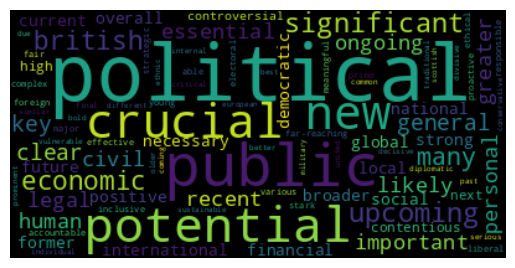

noun


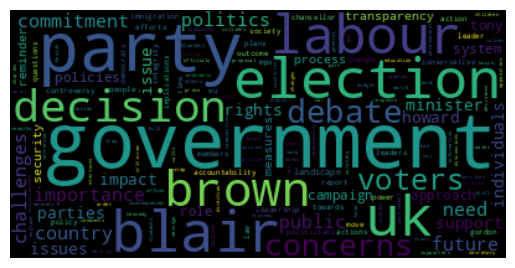

,


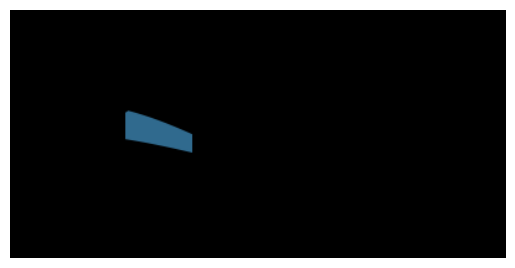

vbd


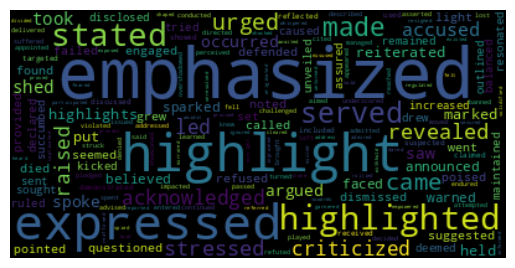

vb


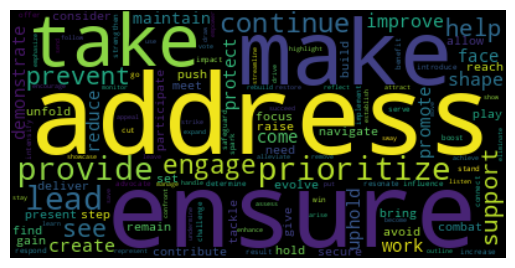

vbn


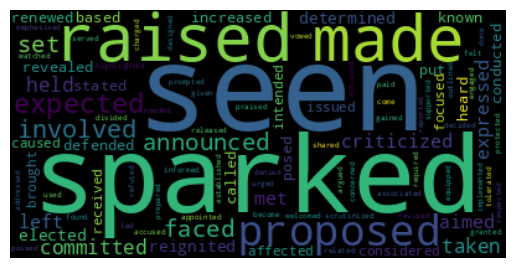

.


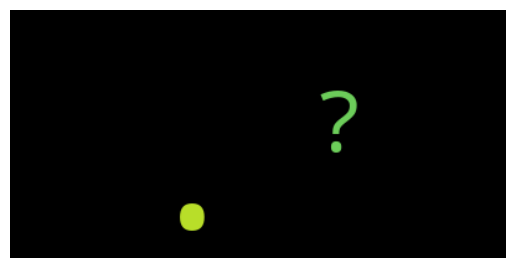

in


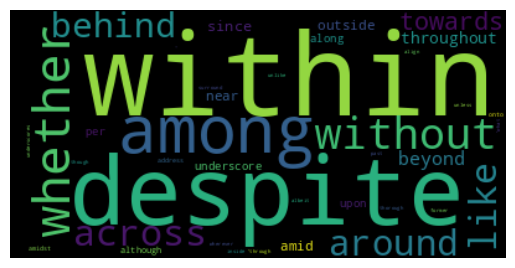

md


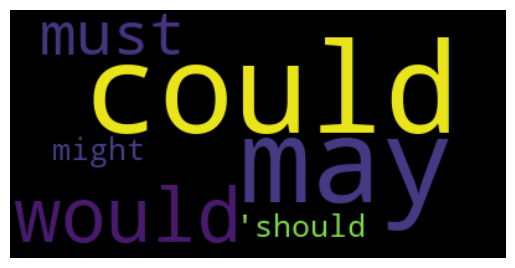

rb


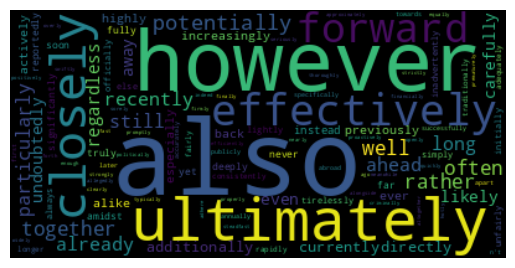

vbg


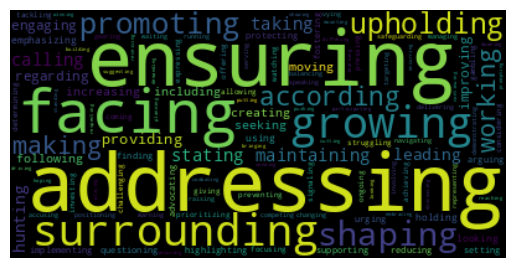

pos


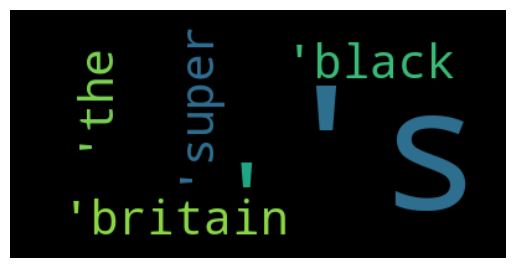

vbp


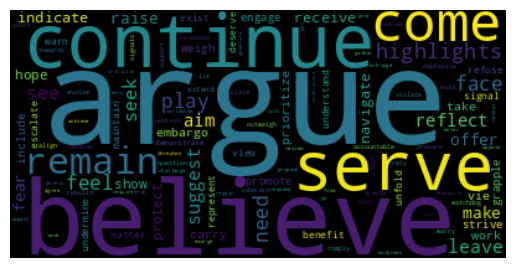

cd


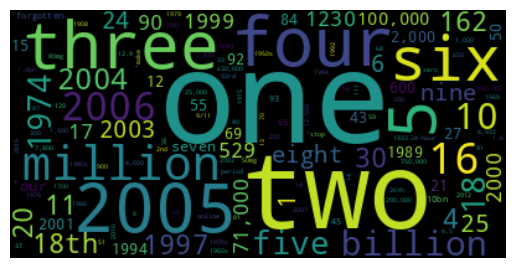

dt


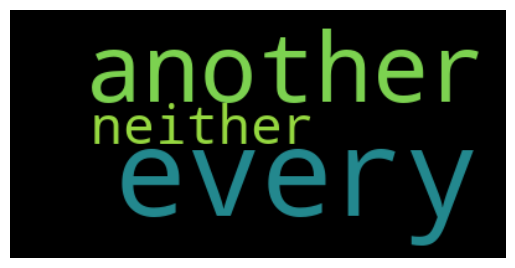

vbz


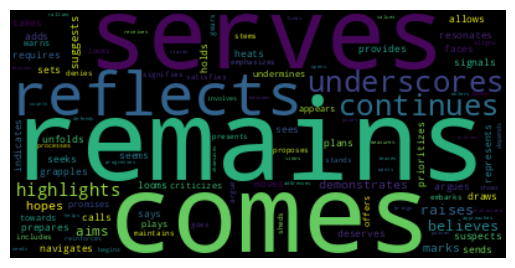

prp


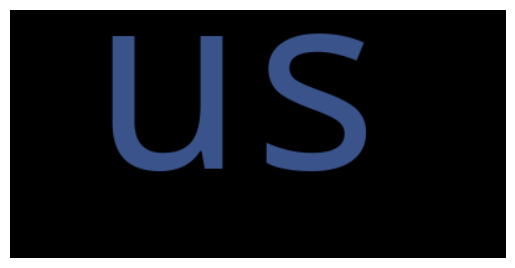

(


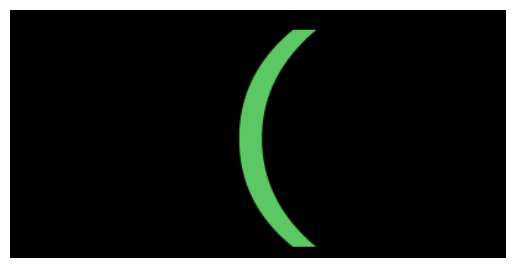

)


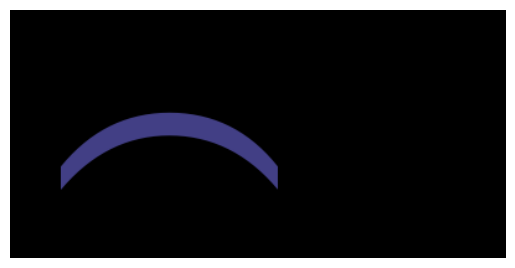

''


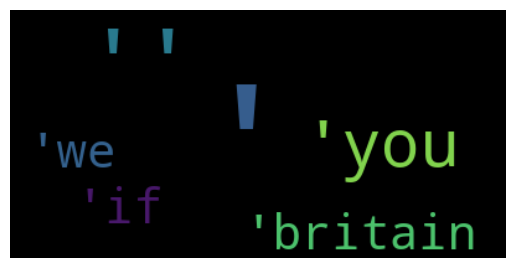

rbr


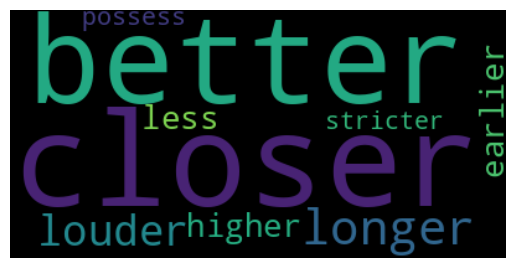

wp


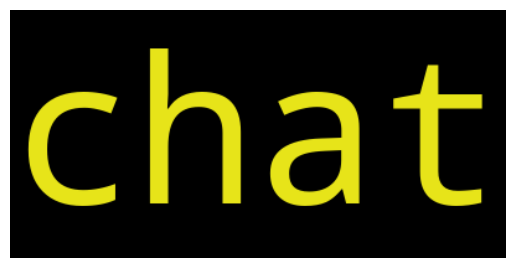

wp$


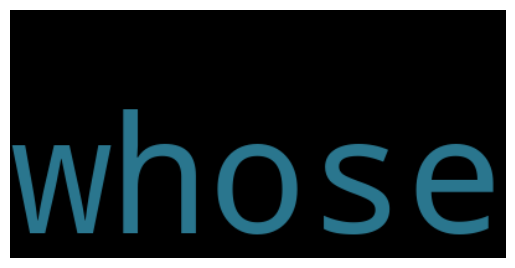

rp


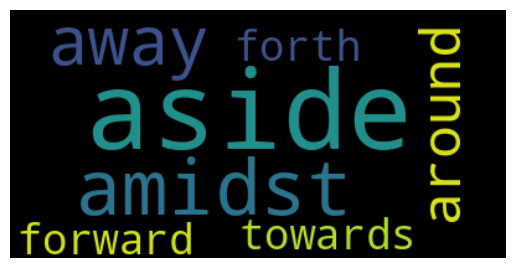

:


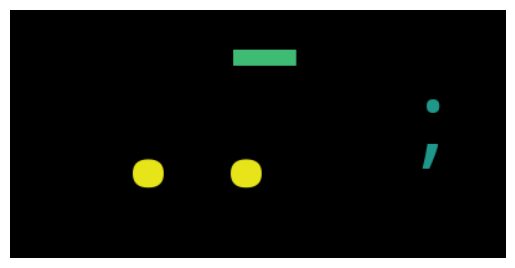

wdt


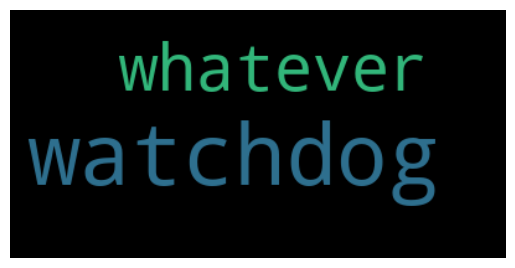

rbs


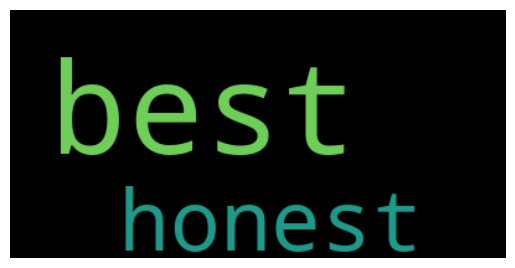

pdt


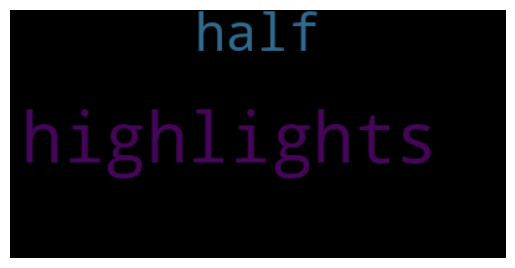

fw


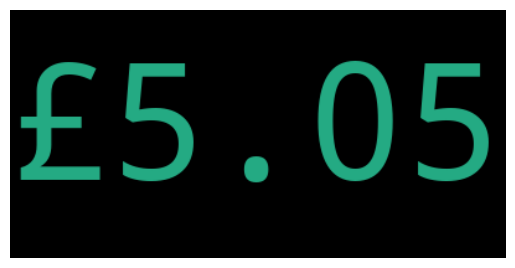

cc


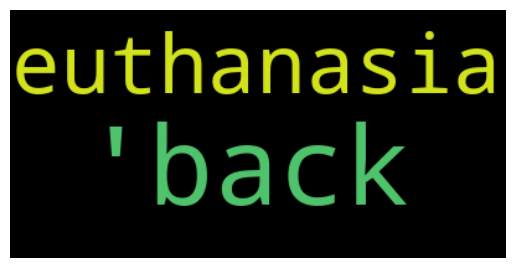

$


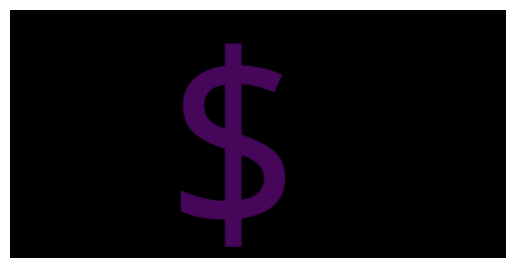

``


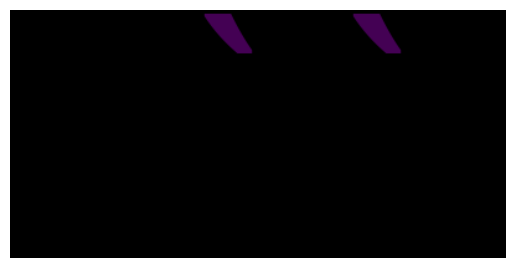

In [26]:
for tag_class, freq in frequencies_gpts.items():
    print(tag_class)
    show_wordcloud(freq)

adjective


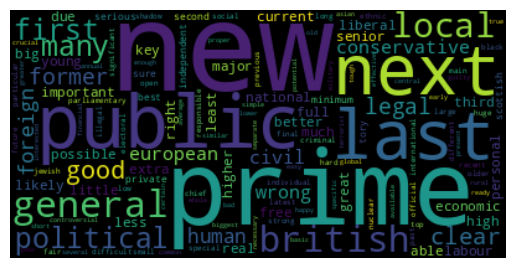

noun


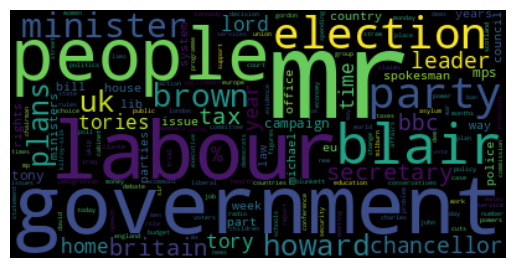

md


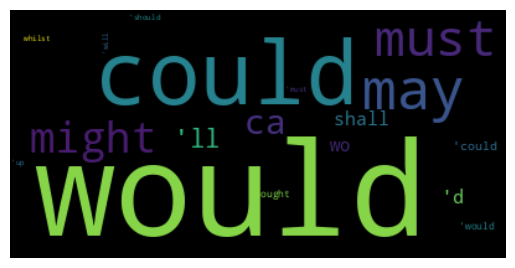

vb


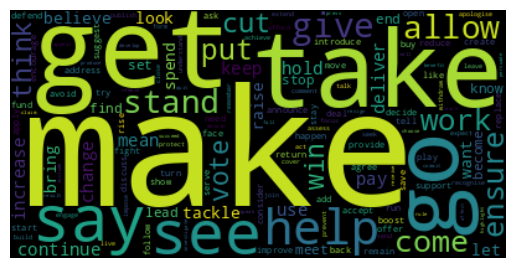

vbn


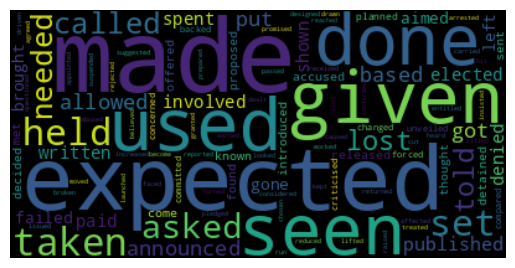

,


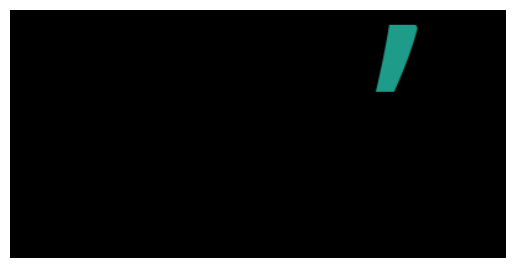

vbd


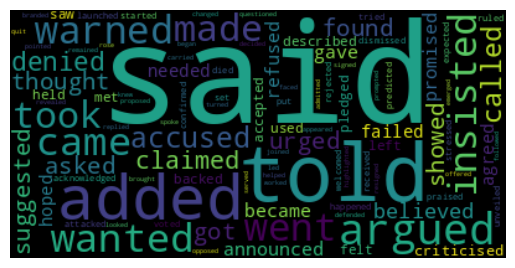

.


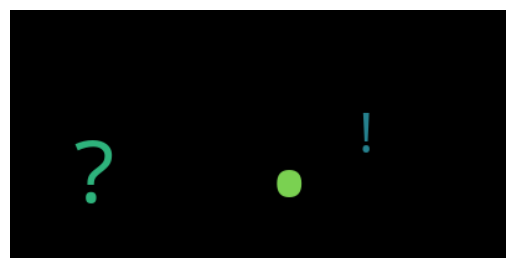

vbz


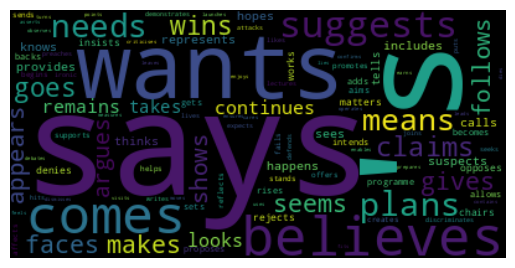

pos


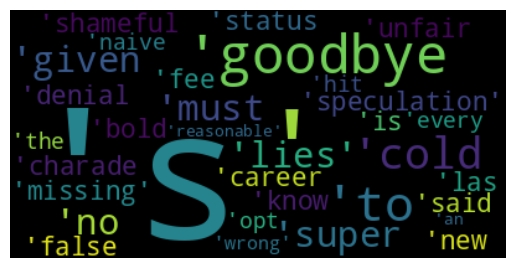

``


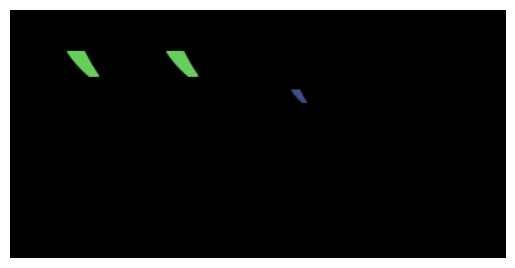

''


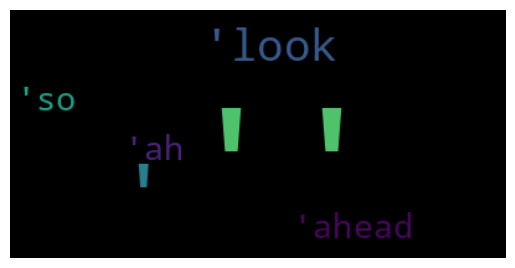

rb


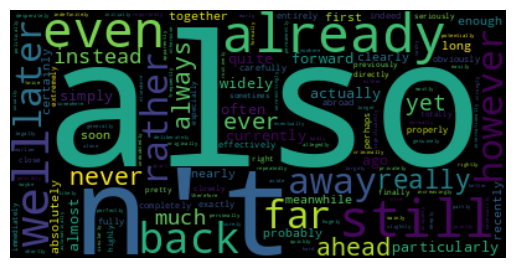

in


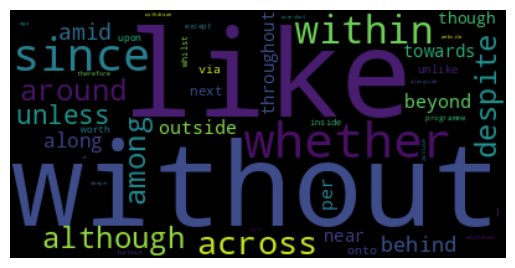

cd


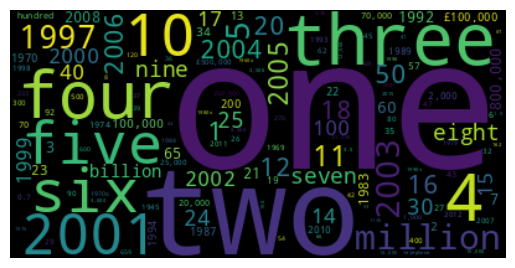

vbg


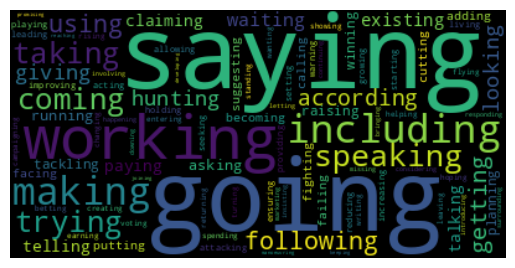

:


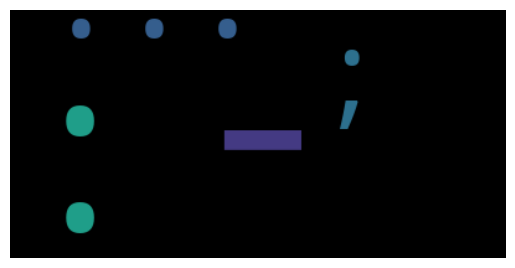

vbp


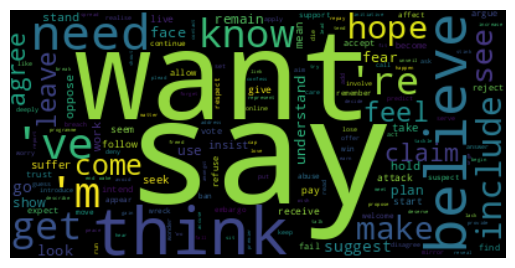

(


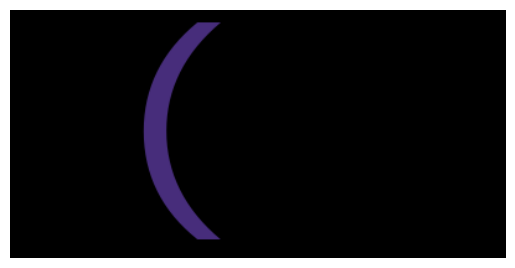

)


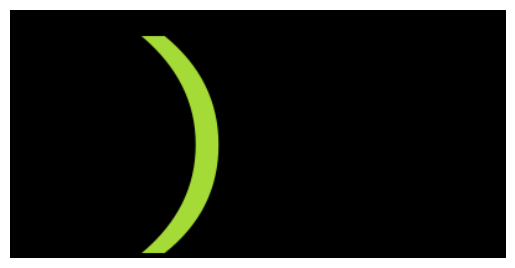

dt


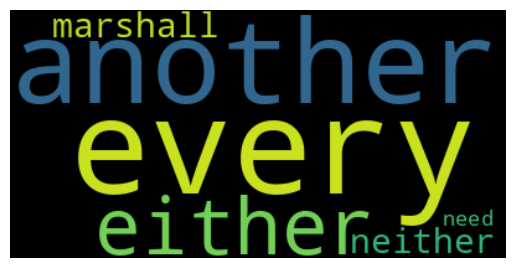

prp


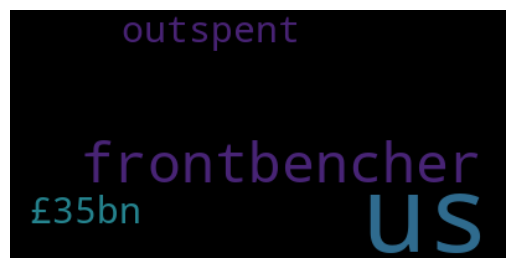

fw


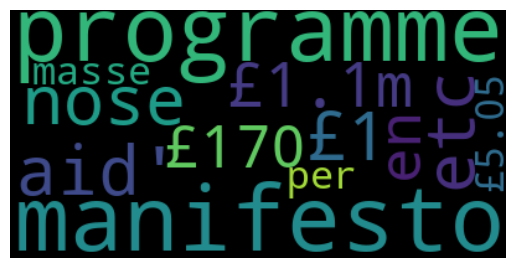

rp


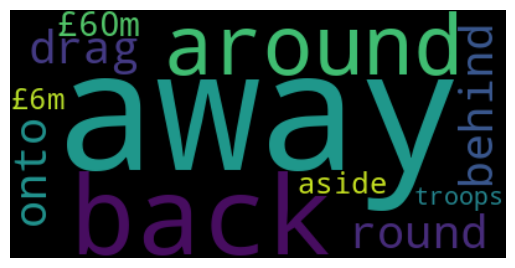

rbr


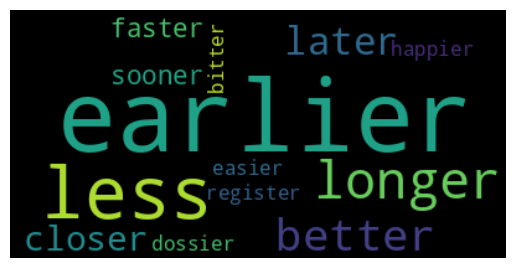

ex


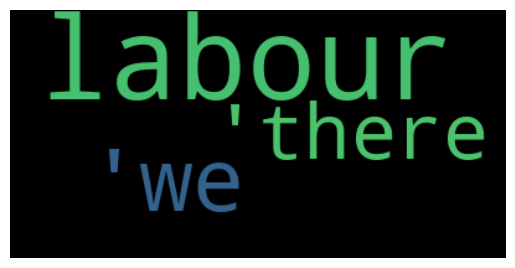

pdt


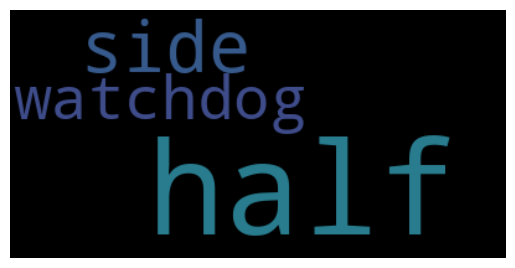

wrb


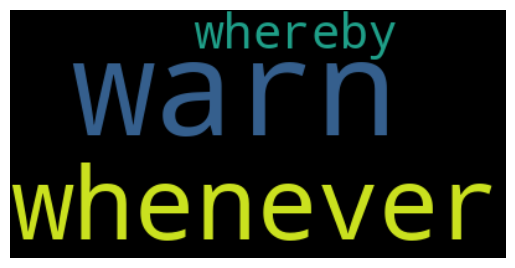

uh


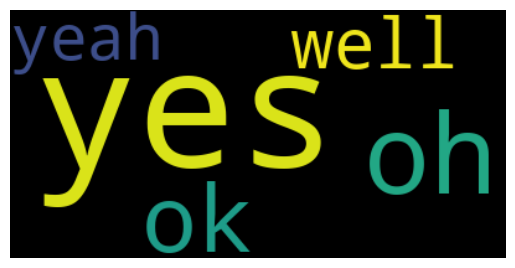

wp$


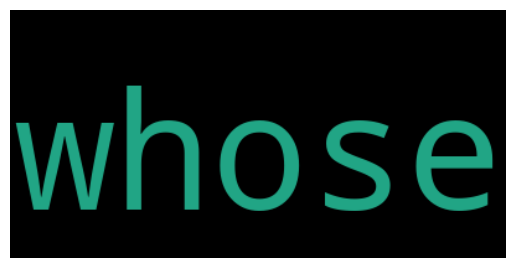

cc


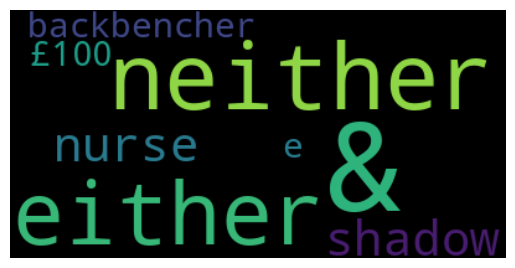

wp


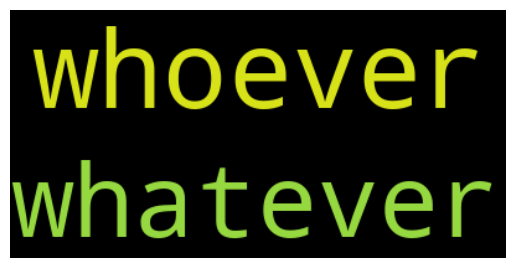

$


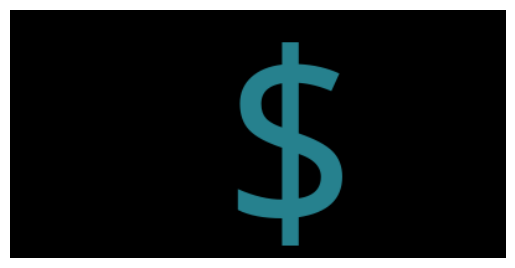

#


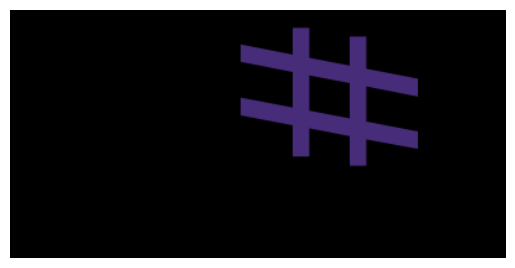

wdt


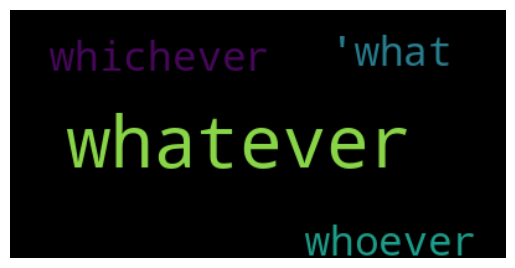

sym


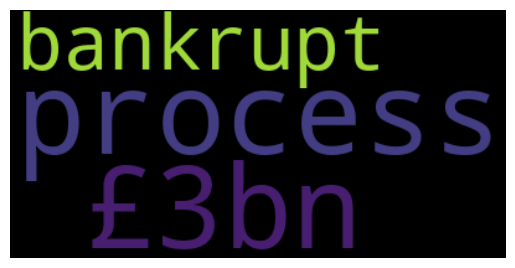

rbs


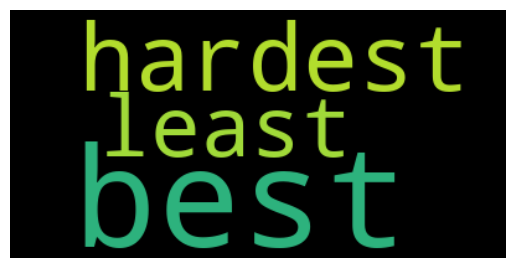

prp$


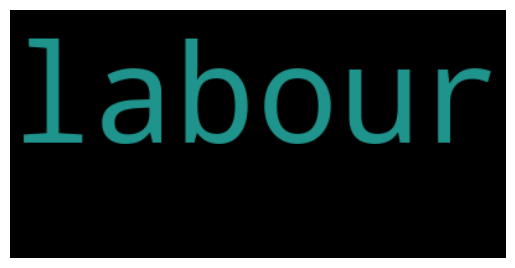

In [23]:
for tag_class, freq in frequencies.items():
    print(tag_class)
    show_wordcloud(freq)

---

### Summary Statistics

- Compute summary statistics such as mean, median, mode, standard deviation, etc., for relevant columns like word count, article length, etc.
- Determine the distribution of article metrics (e.g., length, sentence count, token count, etc.).

In [27]:
def create_sum_df(docs):
    columns = [
        'name',
        'length',
        'count_paragraphs',
        'count_sentences',
        'count_tokens',
    ]

    data = []
    for doc in docs:
        row = {}
        for column in columns:    
            row[column] = doc[column]
        for column, count in doc['count_pos_tags'].items():
            row[column] = count
            pass
        data.append(row)
        
    df = pd.DataFrame(data)  # , columns=columns)
    df.fillna(0, inplace=True)
    # df.head()

    df['chars_per_paragraph'] = df['length'] / df['count_paragraphs']
    df['chars_per_sentence'] = df['length'] / df['count_sentences']
    df['chars_per_token'] = df['length'] / df['count_tokens']
    #
    df['tokens_per_paragraph'] = df['count_tokens'] / df['count_paragraphs']
    df['tokens_per_sentence'] = df['count_tokens'] / df['count_sentences']
    #
    df['sentences_per_paragraph'] = df['count_sentences'] / df['count_paragraphs']

    # print(df.head())
    # print(df.describe())

    return df

In [28]:
df = create_sum_df(docs)
df_phi2 = create_sum_df(docs_phi2)
df_mistral = create_sum_df(docs_mistral)
df_gpts = create_sum_df(docs_gpts)
df.describe()

length  count_paragraphs  count_sentences  count_tokens  \
count    417.000000        417.000000       417.000000    417.000000   
mean    2684.088729          6.354916        20.949640    514.944844   
std     1714.424493          4.077811        16.030465    336.321117   
min      503.000000          3.000000         4.000000     98.000000   
25%     1879.000000          5.000000        15.000000    360.000000   
50%     2629.000000          6.000000        20.000000    505.000000   
75%     3149.000000          7.000000        24.000000    598.000000   
max    25485.000000         56.000000       254.000000   4977.000000   

              NNS          MD          VB          NN          IN         NNP  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean    27.774580    8.398082   20.690647   65.764988   53.107914   49.465228   
std     20.164278    7.922388   17.160378   43.702583   36.919876   25.261980   
min      2.000000    0.000000    0.000000   12.000000   11.000000    9.000000   
25%     16.000000    5.000000   13.000000   45.000000   38.000000   34.000000   
50%     25.000000    7.000000   19.000000   62.000000   50.000000   45.000000   
75%     35.000000   11.000000   26.000000   78.000000   61.000000   62.000000   
max    248.000000   95.000000  234.000000  588.000000  549.000000  288.000000   

       ...         WP$           $           #         SYM  \
count  ...  417.000000  417.000000  417.000000  417.000000   
mean   ...    0.071942    0.028777    0.016787    0.007194   
std    ...    0.276663    0.266993    0.161740    0.084615   
min    ...    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000   
max    ...    2.000000    4.000000    2.000000    1.000000   

       chars_per_paragraph  chars_per_sentence  chars_per_token  \
count           417.000000          417.000000       417.000000   
mean            424.028579          130.222128         5.233459   
std              89.594389           15.299950         0.214173   
min             155.272727           83.974684         4.505128   
25%             365.500000          119.277778         5.092450   
50%             417.142857          129.409091         5.217822   
75%             471.600000          140.333333         5.363889   
max             861.500000          175.857143         5.968966   

       tokens_per_paragraph  tokens_per_sentence  sentences_per_paragraph  
count            417.000000           417.000000               417.000000  
mean              81.178078            24.892985                 3.278632  
std               17.541860             2.844955                 0.703228  
min               31.000000            16.506329                 1.272727  
25%               69.714286            22.947368                 2.833333  
50%               80.428571            24.695652                 3.166667  
75%               90.833333            26.833333                 3.666667  
max              165.000000            32.928571                 6.600000  

[8 rows x 54 columns]

---

### Compute all feature values


      name  length  count_paragraphs  count_sentences  count_tokens  NNP  \
0  001.txt    2601                 6               19           511   40   
1  002.txt    2326                 6               19           425   44   
2  003.txt    3109                 8               26           604   30   
3  004.txt    1471                 5               13           277   29   
4  005.txt    2860                 8               24           579   73   

    VBZ  NN  IN  JJ  ...    $   FW  SYM    #  chars_per_paragraph  \
0   8.0  53  51  24  ...  0.0  0.0  0.0  0.0           433.500000   
1  11.0  62  52  33  ...  0.0  0.0  0.0  0.0           387.666667   
2  16.0  76  71  30  ...  0.0  0.0  0.0  0.0           388.625000   
3   8.0  36  27  19  ...  0.0  0.0  0.0  0.0           294.200000   
4   8.0  69  55  29  ...  0.0  0.0  0.0  0.0           357.500000   

   chars_per_sentence  chars_per_token  tokens_per_paragraph  \
0          136.894737         5.090020             85.166667   


length  count_paragraphs  count_sentences  count_tokens  \
count    417.000000        417.000000       417.000000    417.000000   
mean    2685.007194          6.354916        20.949640    514.944844   
std     1715.098505          4.077811        16.030465    336.321117   
min      503.000000          3.000000         4.000000     98.000000   
25%     1879.000000          5.000000        15.000000    360.000000   
50%     2629.000000          6.000000        20.000000    505.000000   
75%     3150.000000          7.000000        24.000000    598.000000   
max    25485.000000         56.000000       254.000000   4977.000000   

              NNP         VBZ          NN          IN          JJ         NNS  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean    49.465228   10.937650   65.764988   53.107914   30.369305   27.774580   
std     25.261980   11.417174   43.702583   36.919876   23.270417   20.164278   
min      9.000000    0.000000   12.000000   11.000000    4.000000    2.000000   
25%     34.000000    6.000000   45.000000   38.000000   20.000000   16.000000   
50%     45.000000    9.000000   62.000000   50.000000   28.000000   25.000000   
75%     62.000000   13.000000   78.000000   61.000000   36.000000   35.000000   
max    288.000000  169.000000  588.000000  549.000000  319.000000  248.000000   

       ...           $          FW         SYM           #  \
count  ...  417.000000  417.000000  417.000000  417.000000   
mean   ...    0.028777    0.033573    0.007194    0.016787   
std    ...    0.266993    0.205279    0.084615    0.161740   
min    ...    0.000000    0.000000    0.000000    0.000000   
25%    ...    0.000000    0.000000    0.000000    0.000000   
50%    ...    0.000000    0.000000    0.000000    0.000000   
75%    ...    0.000000    0.000000    0.000000    0.000000   
max    ...    4.000000    2.000000    1.000000    2.000000   

       chars_per_paragraph  chars_per_sentence  chars_per_token  \
count           417.000000          417.000000       417.000000   
mean            424.178887          130.268216         5.235314   
std              89.639302           15.309990         0.214981   
min             155.272727           84.012658         4.505128   
25%             365.500000          119.277778         5.094148   
50%             417.142857          129.466667         5.220109   
75%             471.600000          140.416667         5.366261   
max             862.250000          175.857143         5.968966   

       tokens_per_paragraph  tokens_per_sentence  sentences_per_paragraph  
count            417.000000           417.000000               417.000000  
mean              81.178078            24.892985                 3.278632  
std               17.541860             2.844955                 0.703228  
min               31.000000            16.506329                 1.272727  
25%               69.714286            22.947368                 2.833333  
50%               80.428571            24.695652                 3.166667  
75%               90.833333            26.833333                 3.666667  
max              165.000000            32.928571                 6.600000  

[8 rows x 54 columns]

---

### Scan for documents with metrics out of 95% or 99% percentile 

```
             length  count_paragraphs  count_sentences  count_tokens  \
count    417.000000        417.000000       417.000000    417.000000   
mean    2685.007194          6.354916        20.949640    514.944844   
std     1715.098505          4.077811        16.030465    336.321117   
min      503.000000          3.000000         4.000000     98.000000   
25%     1879.000000          5.000000        15.000000    360.000000   
50%     2629.000000          6.000000        20.000000    505.000000   
75%     3150.000000          7.000000        24.000000    598.000000   
max    25485.000000         56.000000       254.000000   4977.000000

```

In [29]:
columns_extended =(
    'length', 'count_paragraphs', 'count_sentences', 'count_tokens',
    'chars_per_paragraph', 'chars_per_sentence', 'chars_per_token',
    'tokens_per_paragraph', 'tokens_per_sentence',
    'sentences_per_paragraph',
)

for column in columns_extended:
    percentile_99 = np.percentile(df[column], 99)
    outliers = df[df[column] > percentile_99]
    print(outliers[['name', column]])

        name  length
82   290.txt   25485
323  406.txt    5672
348  380.txt   18389
355  293.txt   13829
356  250.txt    6634
        name  count_paragraphs
82   290.txt                56
348  380.txt                41
355  293.txt                47
356  250.txt                20
390  111.txt                17
        name  count_sentences
82   290.txt              254
348  380.txt              151
355  293.txt              134
356  250.txt               79
390  111.txt               53
        name  count_tokens
82   290.txt          4977
323  406.txt          1089
348  380.txt          3633
355  293.txt          2686
356  250.txt          1304
        name  chars_per_paragraph
36   210.txt           764.000000
50   411.txt           699.714286
247  328.txt           767.400000
389  292.txt           775.200000
401  101.txt           861.500000
        name  chars_per_sentence
118  172.txt          175.857143
137  052.txt          174.200000
210  362.txt          171.350000
236  175.t

In [30]:
# phi2 = 0, mistral = 1, gpts = 2, bbc=3
df_phi2["type"] = 0
df_mistral["type"] = 1
df_gpts["type"] = 2
df["type"] = 3

combined_df = pd.concat([df, df_phi2, df_mistral, df_gpts])

In [31]:
combined_df.reset_index(drop=True, inplace=True)

In [32]:
combined_df.loc[combined_df['type'] == 1]["count_paragraphs"].describe()

count    417.000000
mean       5.695444
std        3.398360
min        0.000000
25%        3.000000
50%        6.000000
75%        8.000000
max       17.000000
Name: count_paragraphs, dtype: float64

In [33]:
combined_df['count_paragraphs']

0       6
1       4
2       5
3       8
4       5
       ..
1663    1
1664    1
1665    1
1666    1
1667    1
Name: count_paragraphs, Length: 1668, dtype: int64

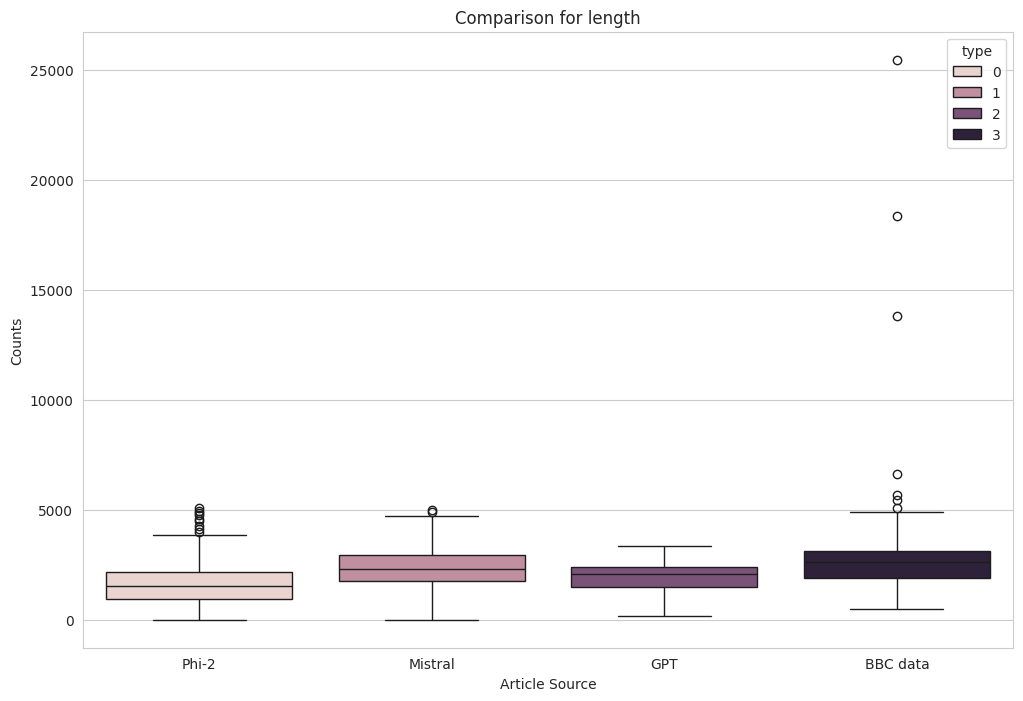

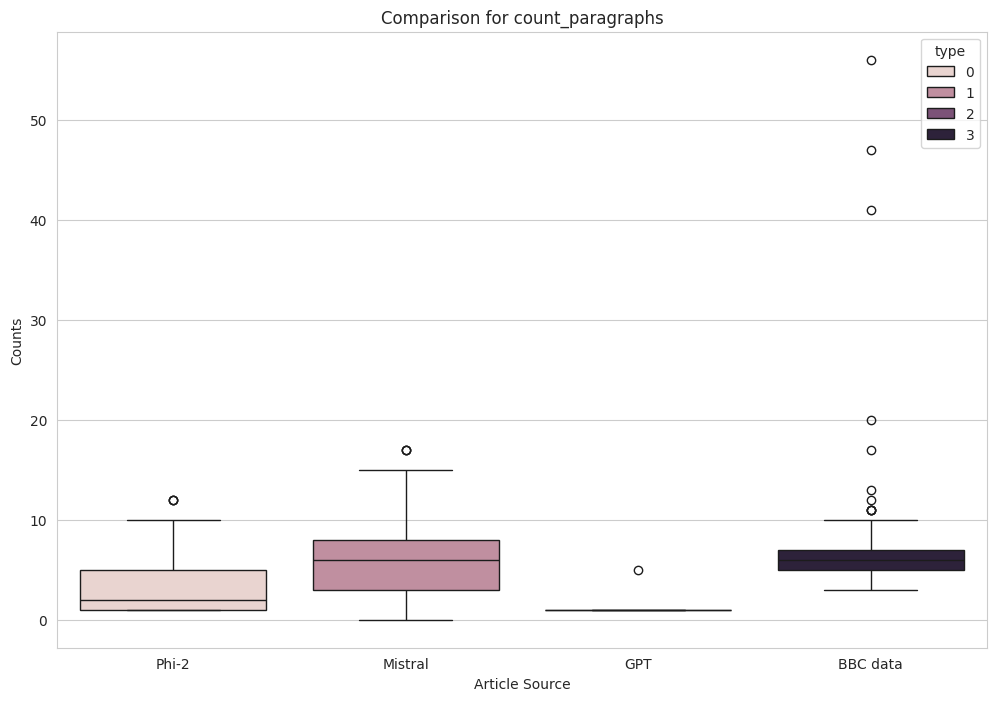

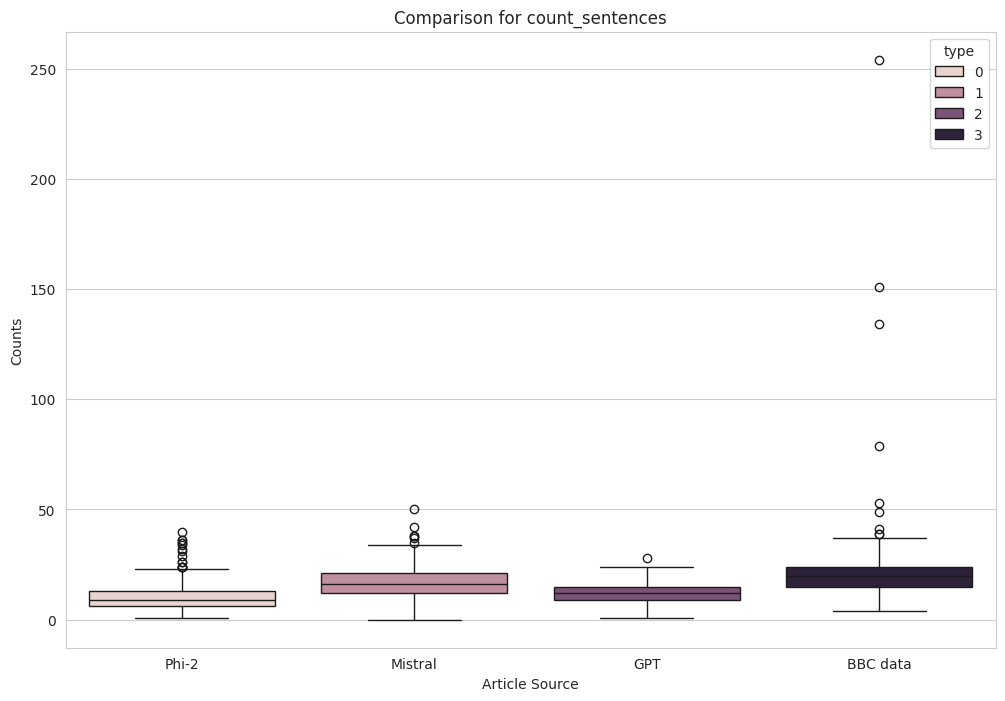

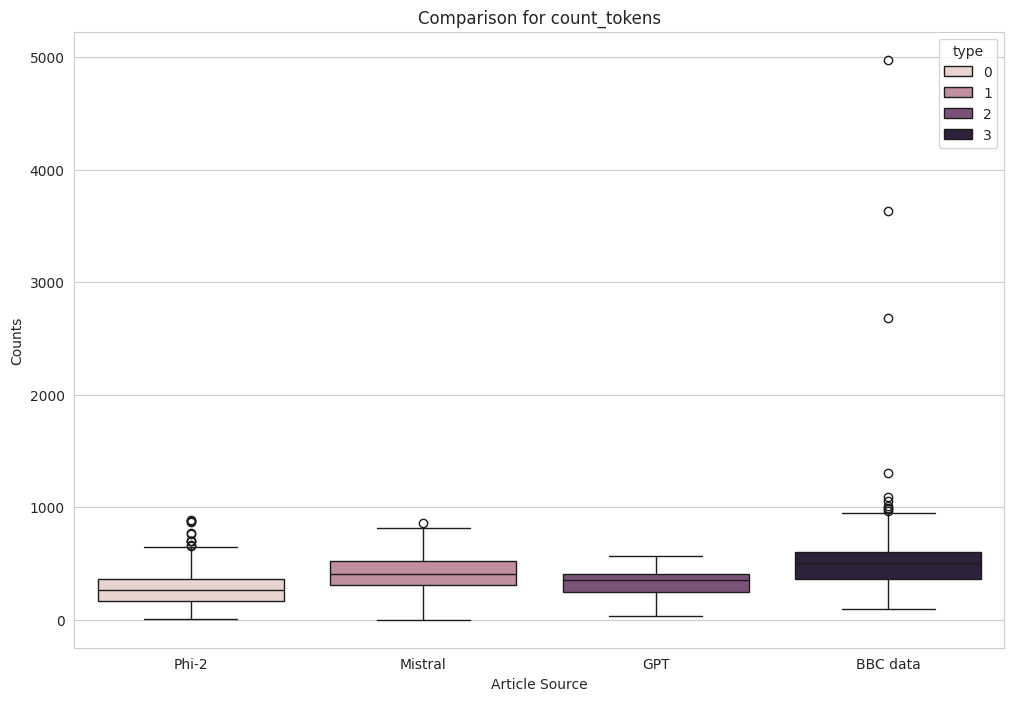

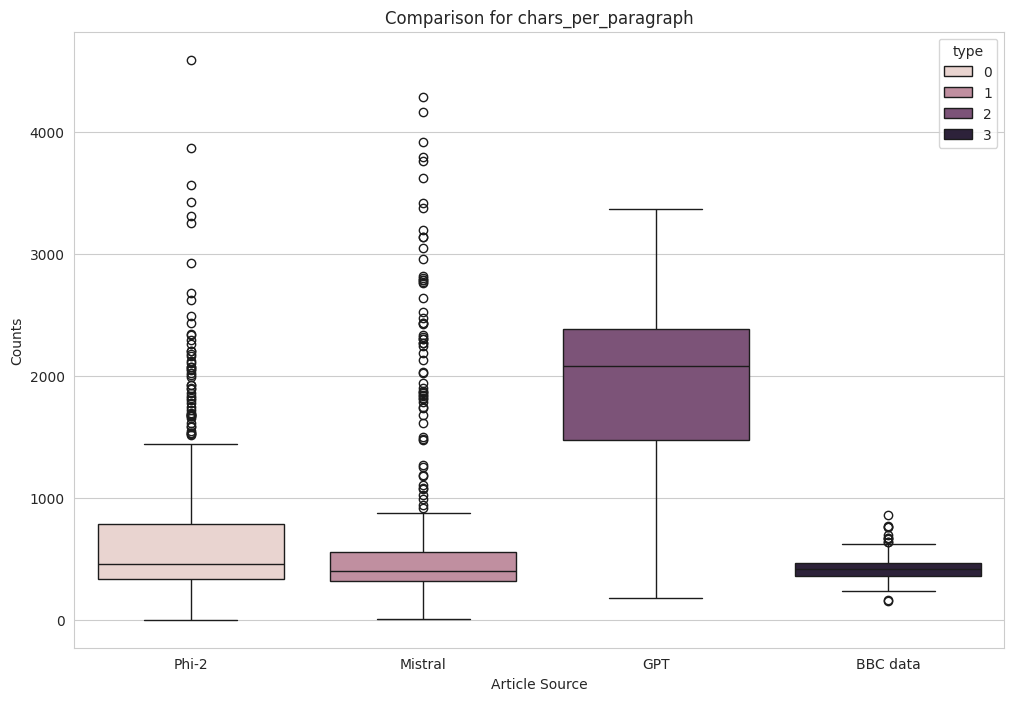

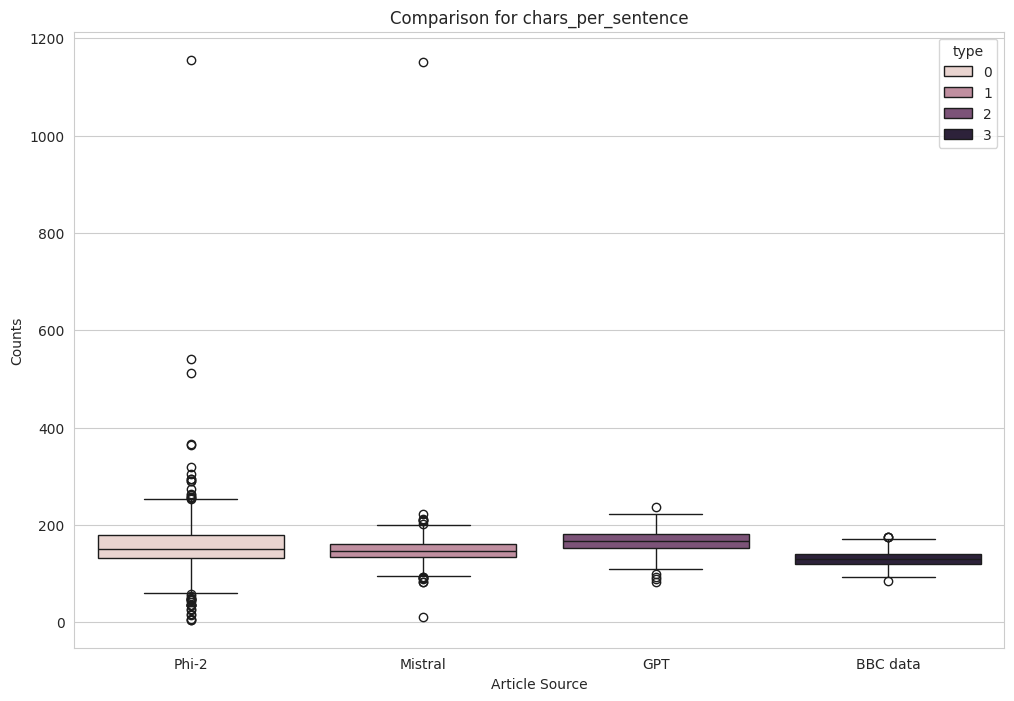

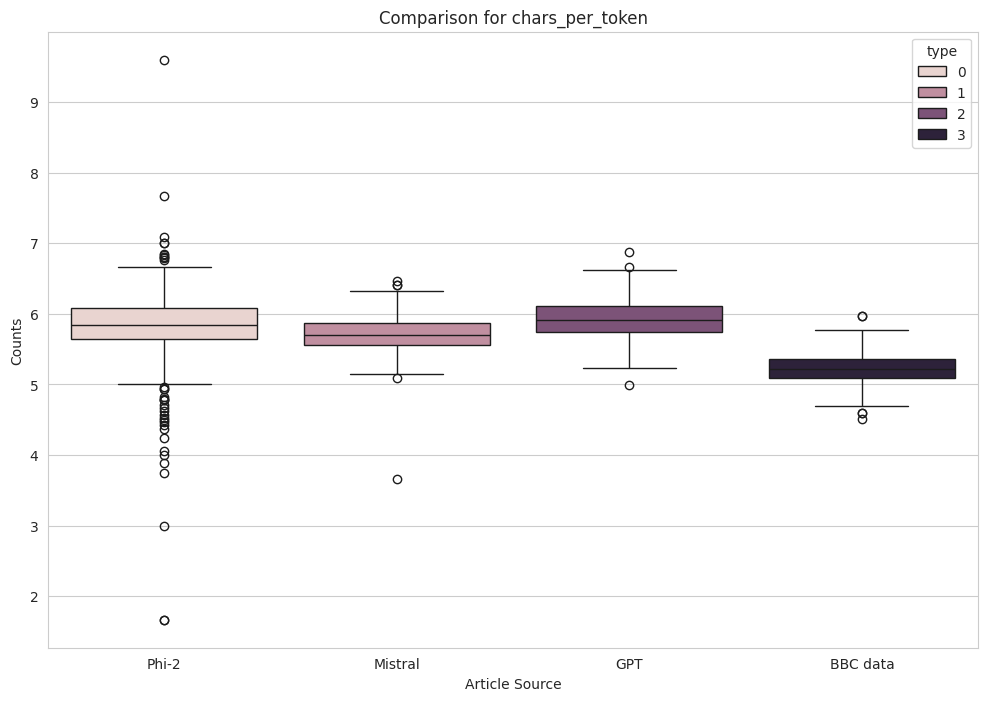

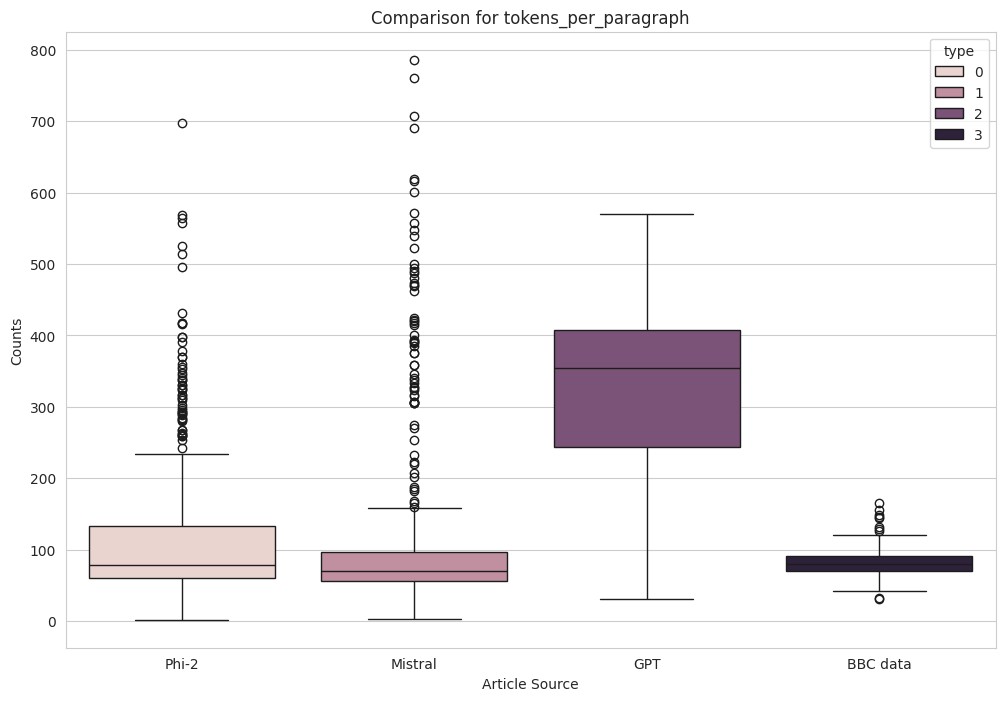

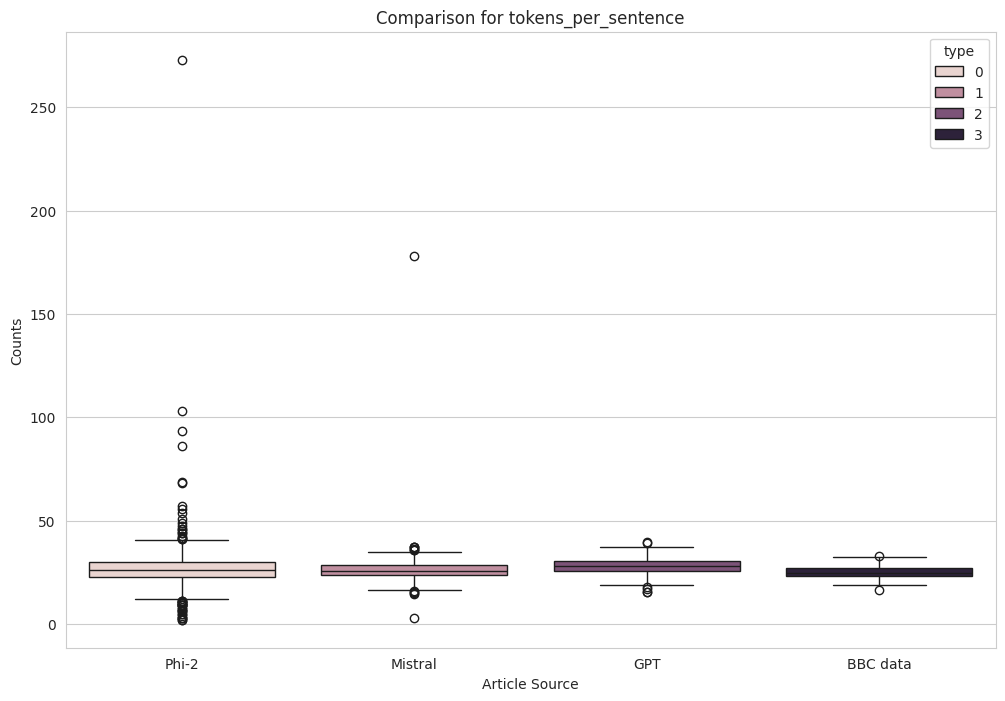

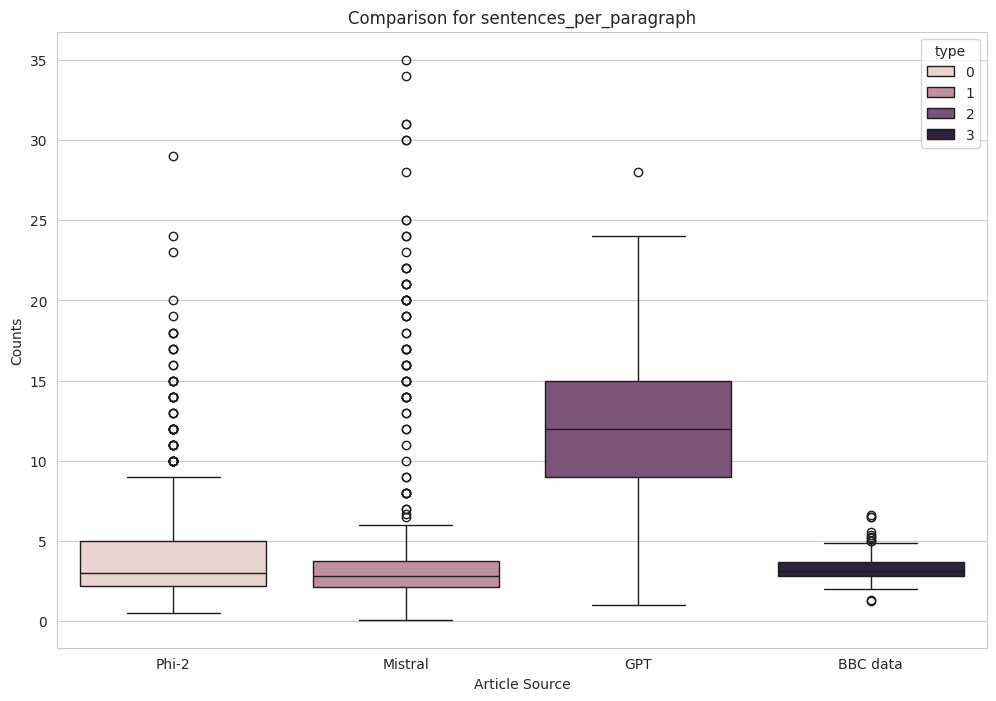

In [35]:
sns.set_style("whitegrid")
for column in columns_extended:
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='type', y=column, data=combined_df, hue='type')
    plt.title('Comparison for ' + column)
    plt.xlabel('Article Source')
    plt.ylabel('Counts')
    plt.xticks([0, 1, 2, 3], ['Phi-2', 'Mistral', 'GPT', 'BBC data'])
    plt.savefig(f"{column}_plots.png")

In [ ]:
# terence version
# for column in columns_extended:
#     sns.boxplot(data=df[column])
#     plt.title('Box Plot for ' + column)
#     plt.ylabel('Values')
#     plt.show()

In [59]:
# df = df[df.length < 10000]

print("len(df):", len(df))  # 414, 3 removed.
print(df.describe())

len(df): 417
             length  count_paragraphs  count_sentences  count_tokens  \
count    417.000000        417.000000       417.000000    417.000000   
mean    2684.088729          6.354916        20.949640    514.944844   
std     1714.424493          4.077811        16.030465    336.321117   
min      503.000000          3.000000         4.000000     98.000000   
25%     1879.000000          5.000000        15.000000    360.000000   
50%     2629.000000          6.000000        20.000000    505.000000   
75%     3149.000000          7.000000        24.000000    598.000000   
max    25485.000000         56.000000       254.000000   4977.000000   

              NNS          MD          VB          NN          IN         NNP  \
count  417.000000  417.000000  417.000000  417.000000  417.000000  417.000000   
mean    27.774580    8.398082   20.690647   65.764988   53.107914   49.465228   
std     20.164278    7.922388   17.160378   43.702583   36.919876   25.261980   
min      2.000

In [ ]:
for column in df.columns.tolist()[1:]:
    values = df[column]
    sns.histplot(values, kde=True, bins=20)
    plt.show()

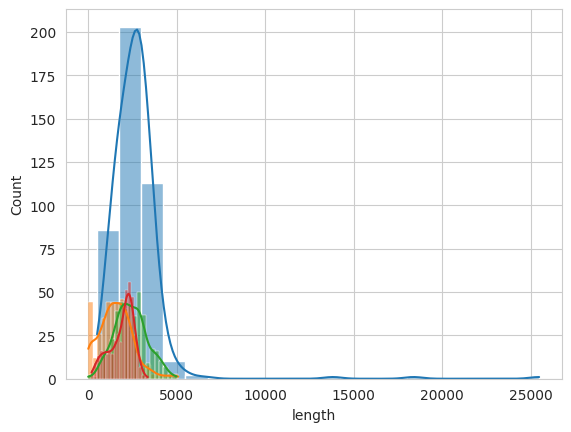

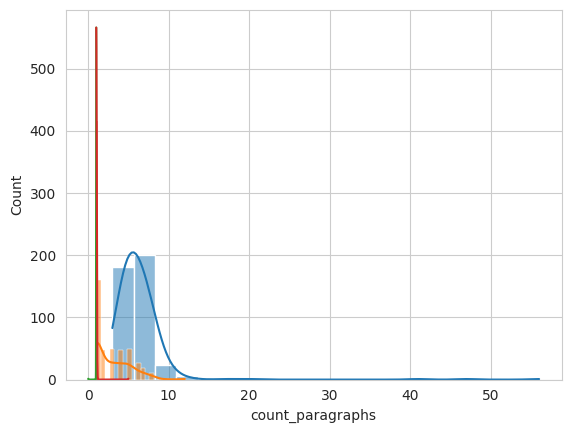

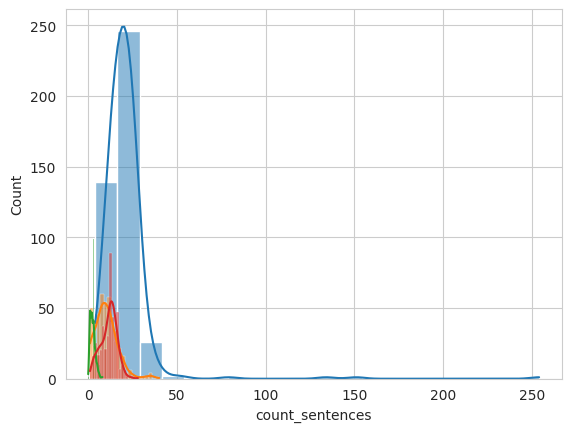

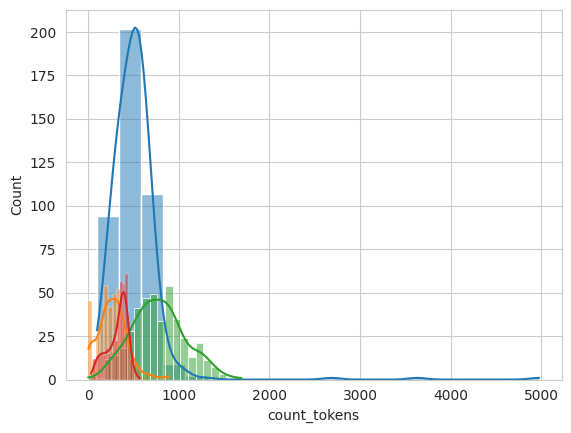

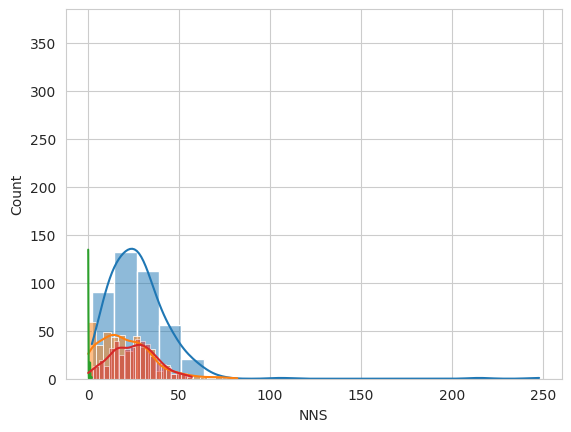

KeyError: 'MD'

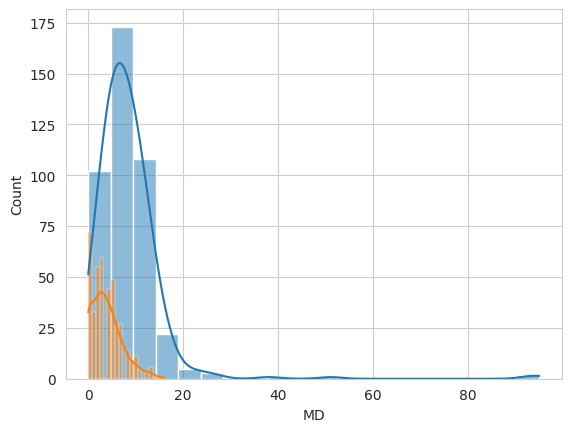

In [61]:
for column in df.columns.tolist()[1:]:  # exclude the first column name from the list, which is 'name'
    values = df[column]
    sns.histplot(values, kde=True, bins=20, label="BBC data")
    sns.histplot(df_phi2[column], kde=True, bins=20, label="Phi-2")
    sns.histplot(df_mistral[column], kde=True, bins=20, label="Mistal")
    sns.histplot(df_gpts[column], kde=True, bins=20, label="GPT")
    plt.show()

In [65]:
# drop away docs that are too long, just to plot the histogram
df_drop = df.drop(df.loc[df[column] > 6000].index)

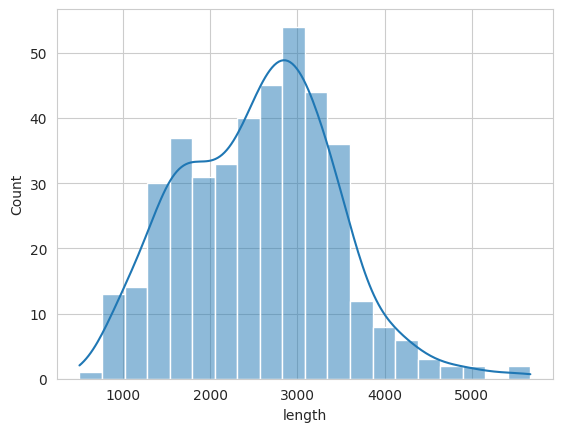

In [66]:
column = "length"
values = df_drop[column]
no_bins = 20
sns.histplot(values, kde=True, bins=no_bins, label="BBC data")

plt.show()

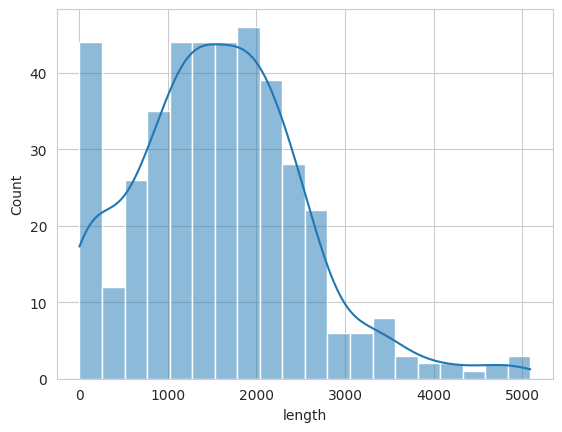

In [64]:
sns.histplot(df_phi2[column], kde=True, bins=no_bins, label="Phi-2")
plt.show()

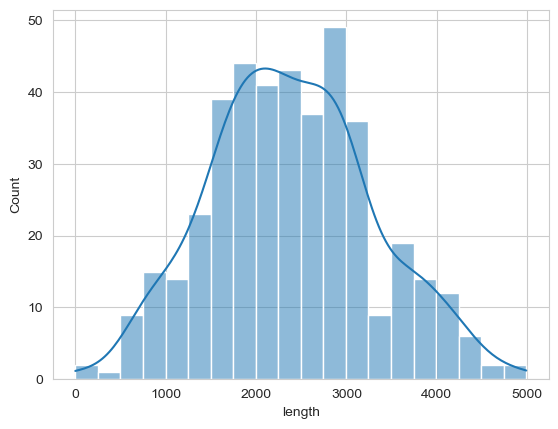

In [30]:
sns.histplot(df_mistral[column], kde=True, bins=no_bins, label="Mistal")
plt.show()

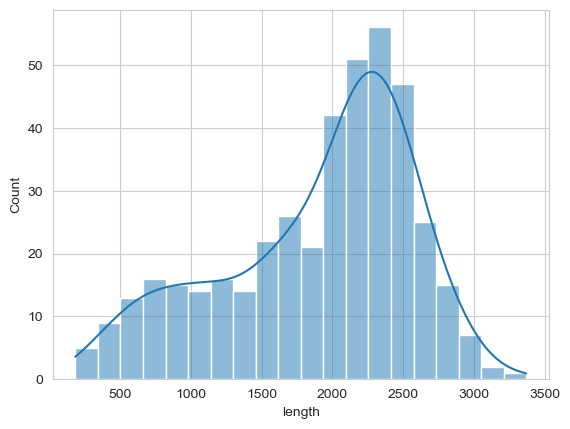

In [31]:
sns.histplot(df_gpts[column], kde=True, bins=no_bins, label="GPT")
plt.show()

In [23]:
df.to_csv("eda.csv", index=False)

---

### Analysis of sentence structure

Analysis of sentence structure without checking POS (part-of-speech) tags individually by utilizing various NLP techniques and tools. Here are a few methods:

1. Dependency Parsing: Dependency parsing is the process of analyzing the grammatical structure of a sentence to determine the relationships between words. Dependency parsers analyze how words in a sentence depend on each other syntactically. You can use libraries like SpaCy or NLTK, which offer dependency parsing functionality.
2. Constituency Parsing: Constituency parsing involves analyzing the sentence to identify its syntactic structure based on constituents (phrases) such as noun phrases, verb phrases, etc. This approach aims to find hierarchical structures within the sentence. Libraries like NLTK provide tools for constituency parsing.
3. Sentence Diagramming: Sentence diagramming is a visual method used to represent the grammatical structure of a sentence. It involves breaking down the sentence into its constituent parts and representing them in a hierarchical manner using diagrams. While not automated, sentence diagramming can help in understanding the structure of a sentence without relying on POS tags.
4. Rule-Based Analysis: You can also perform structural analysis of sentences using rule-based approaches, where you define grammatical rules and patterns to analyze the structure of sentences. This method doesn't necessarily require POS tagging but relies on syntactic rules.
5. Machine Learning Models: You can train machine learning models to perform sentence structure analysis without explicitly checking POS tags. Models such as sequence-to-sequence models or transformers can be trained on annotated data to learn the syntactic structure of sentences.

These methods allow you to analyze the structure of sentences without explicitly checking POS tags individually. Depending on your specific requirements and the complexity of the analysis, you can choose the most suitable approach.

---

### Experiments

In [24]:
import numpy as np
for i in range(10):
    print(np.random.randint(low=-100, high=100))

-15
-18
-3
82
-8
-32
-56
-18
-37
-97
